In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Read the data as an appropriate Time Series data and plot the data.

In [2]:
def parse(x):
    return datetime.strptime(x, '%Y-%m')

In [3]:
sparkling=pd.read_csv('Sparkling.csv',index_col=0,parse_dates=True,date_parser=parse)

In [536]:
sparkling.head()

Sales
YearMonth        
1980-01-01   1686
1980-02-01   1591
1980-03-01   2304
1980-04-01   1712
1980-05-01   1471

In [5]:
sparkling.rename(columns={'Sparkling':'Sales'},inplace=True)

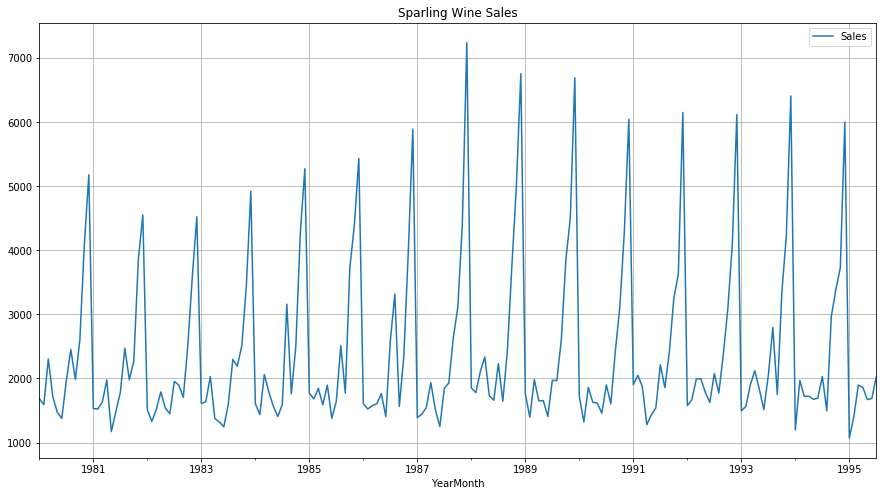

In [537]:
plt.rcParams['figure.figsize'] = 15,8
sparkling.plot()
plt.title('Sparling Wine Sales')
plt.grid()

In [ ]:
#There is yearly seasonality. No. of units sold is at it peak in December every year due to Holiday season(Christmas).
#There are smaller peaks in April(Easter)
#Schools reopen is September after labor day.Fall in sales could be due to that
#After october end Halloween,Thanksgiving,Christmas - high sales

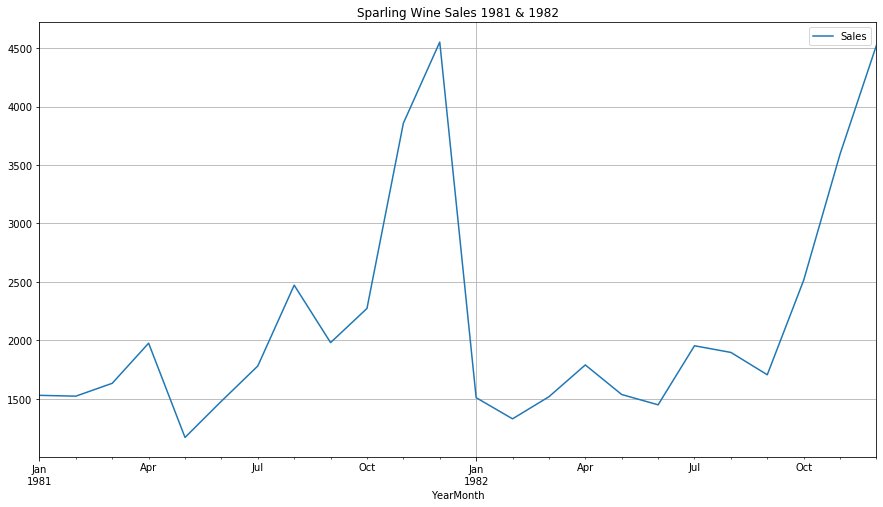

In [538]:
sparkling[(sparkling.index.year == 1981)|(sparkling.index.year == 1982)].plot()
plt.title('Sparling Wine Sales 1981 & 1982')
plt.grid()

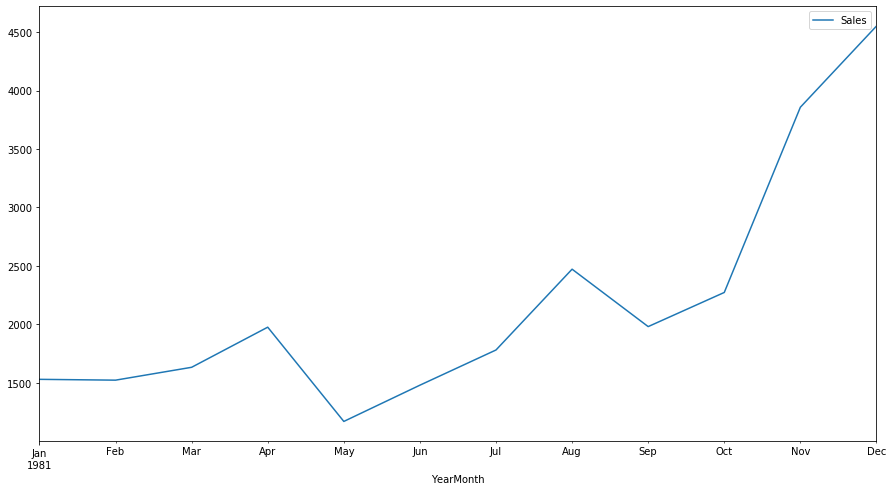

In [8]:
sparkling['1981'].plot()

## 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [9]:
sparkling.describe()

Sales
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

### Year on year boxplot for Wine Sales

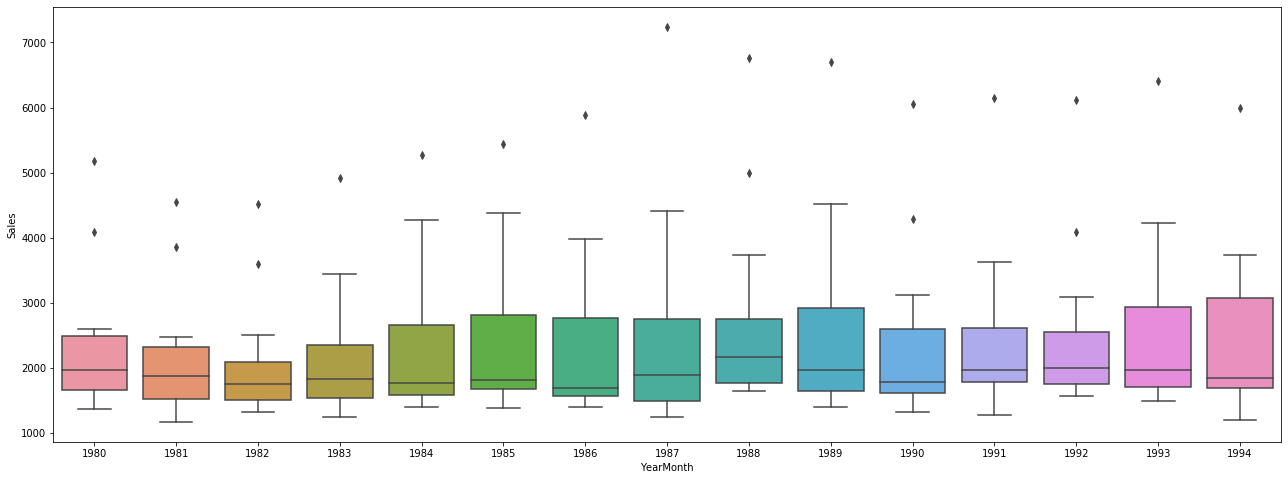

In [539]:
plt.figure(figsize=(22,8))
data=sparkling[sparkling.index.year<1995]
sns.boxplot(data.index.year,data.Sales)

In [ ]:
#Outliers are sales in November and December months

In [85]:
# Month on month boxplot for Wine Sales

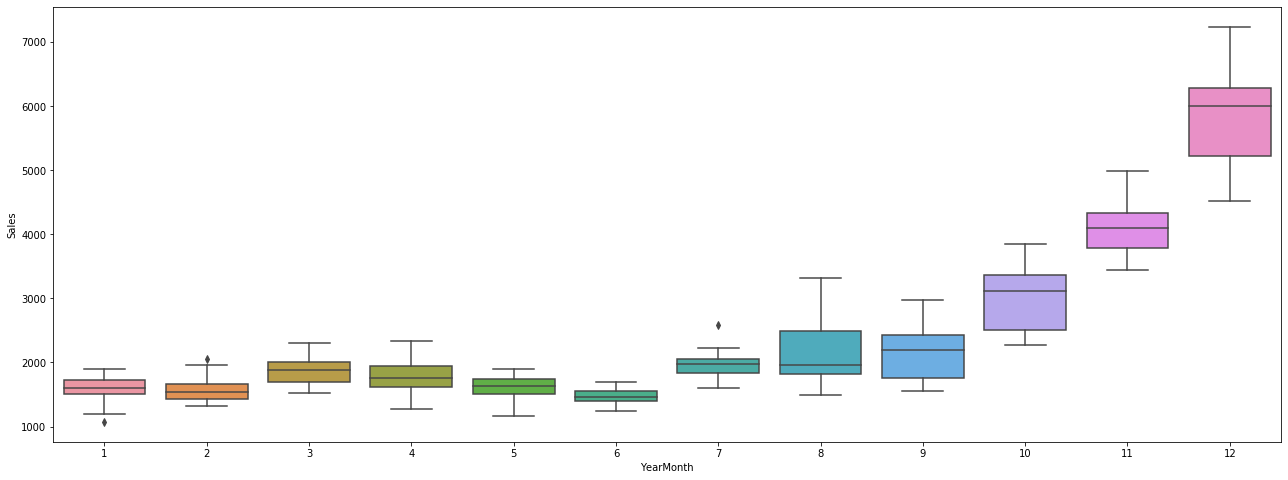

In [11]:
plt.figure(figsize=(22,8))
sns.boxplot(sparkling.index.month,sparkling.Sales)

In [86]:
#After September there is a huge increase in sales

### Month Plot

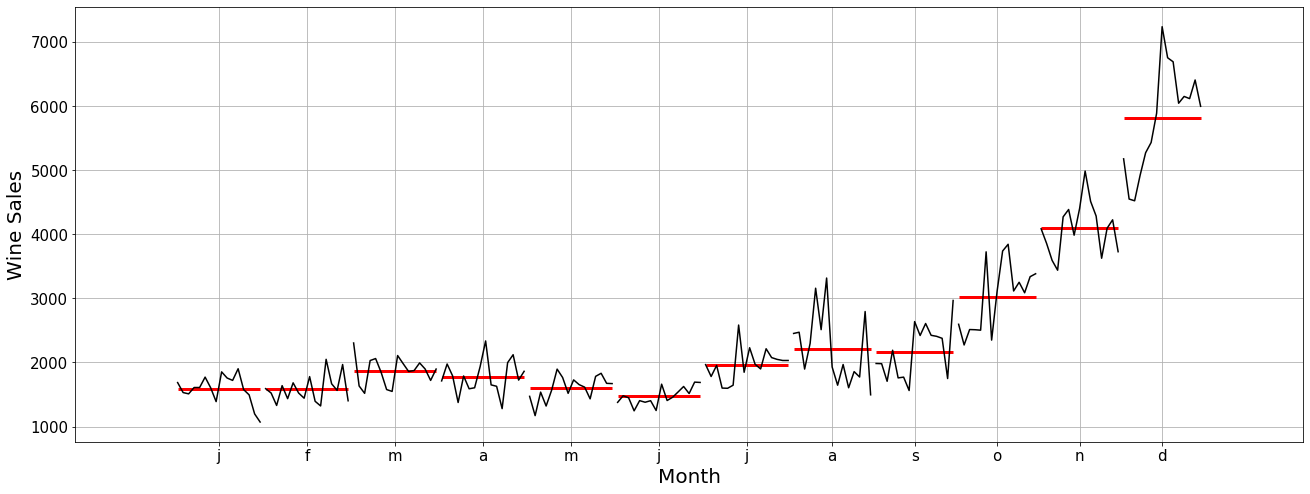

In [12]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(sparkling.Sales,ax=ax)
plt. ylabel('Wine Sales', fontsize=20)
plt. xlabel('Month', fontsize=20)
plt. xticks( fontsize=15)
plt. yticks( fontsize=15)

plt.grid();

### Plot for different months of different years

In [540]:
yearly_sales_across_months=pd.pivot_table(data,values=data,index=data.index.year,columns=data.index.month)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A4AB45208>,
      dtype=object)

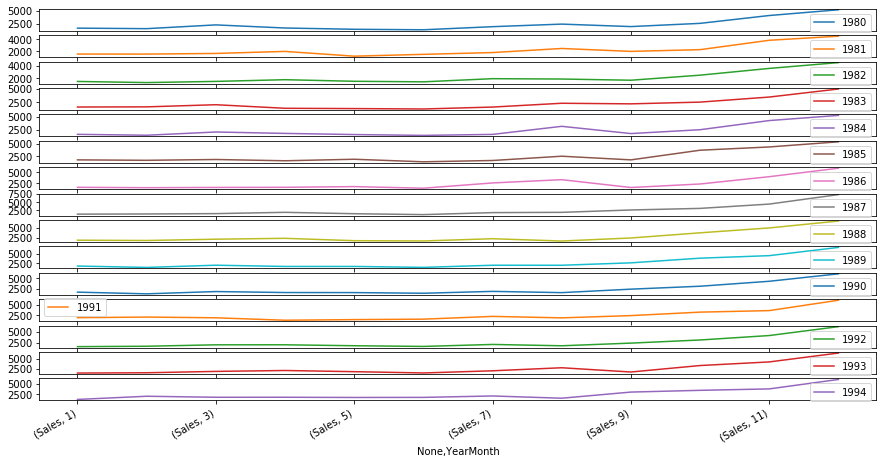

In [541]:
yearly_sales_across_months.T.plot(subplots=True)

### Time Series Heat Maps

Text(0, 0.5, 'Months')

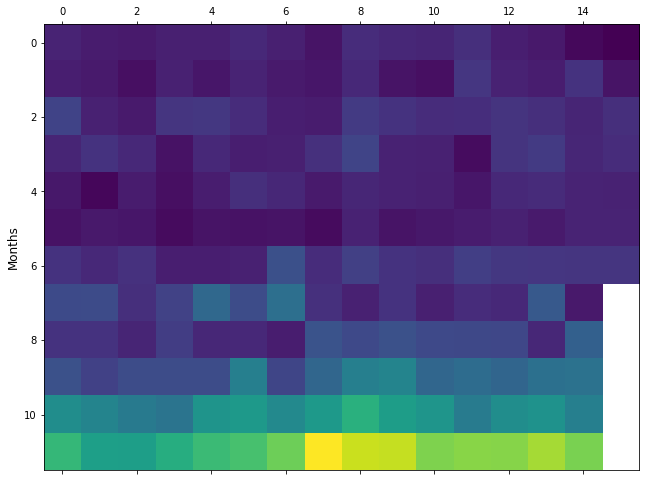

In [164]:
plt.matshow(yearly_sales_across_months.T, interpolation=None, aspect='auto')
plt.ylabel('Months',fontsize=12)
#plt.xticks(y_years)

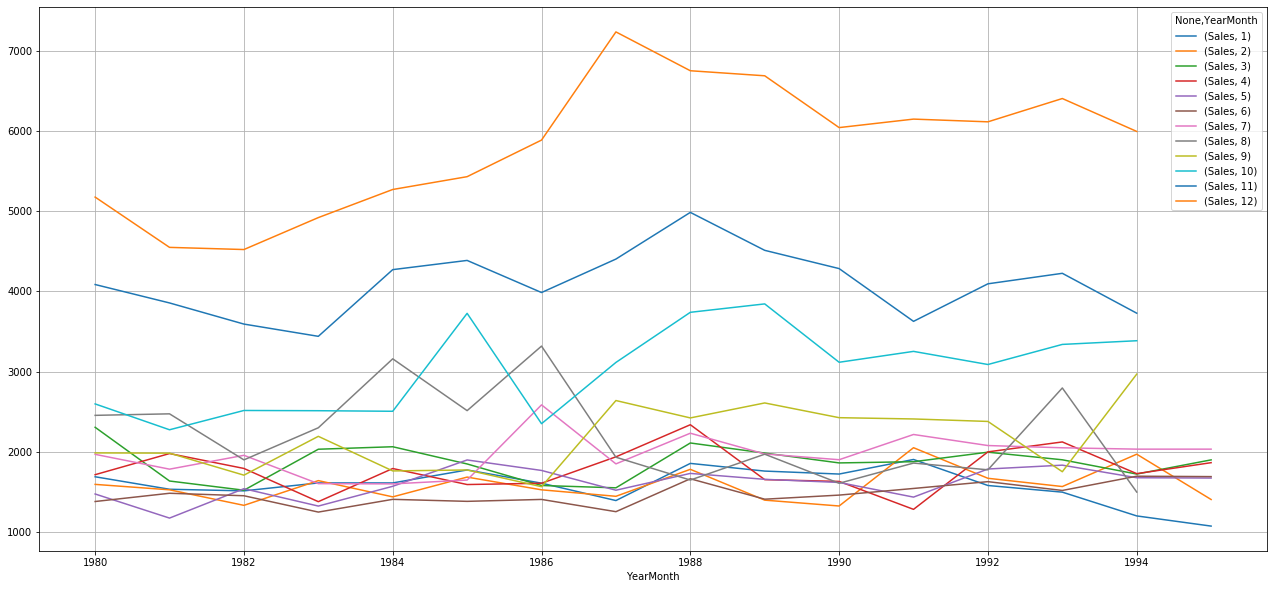

In [121]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

### Plot the Empirical Cumulative Distribution.

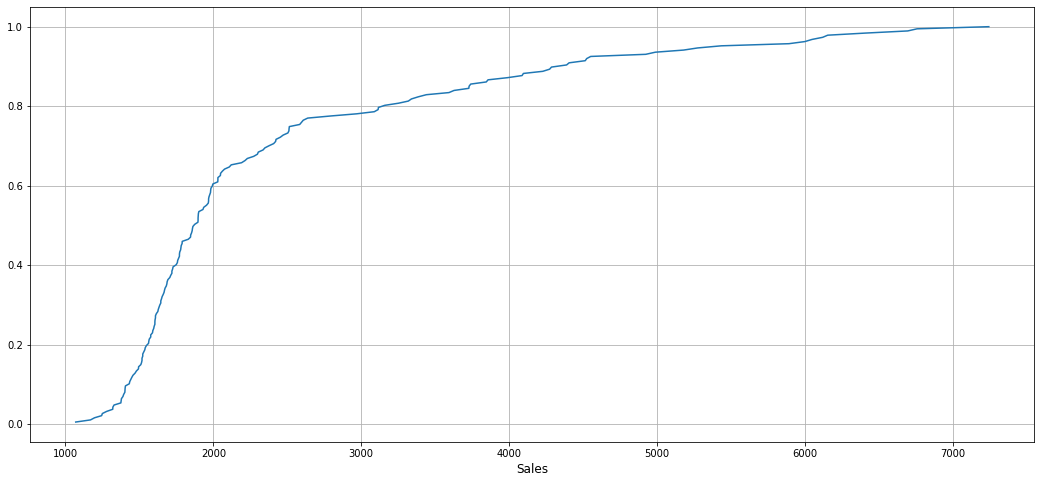

In [173]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(sparkling['Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales',fontsize=12);

This particular graph tells us what percentage of data points refer to what number of Sales.

### Plot the average RetailSales per month and the month on month percentage change of RetailSales.

In [177]:
pct_change

YearMonth
1980-01-01         NaN
1980-02-01   -0.056346
1980-03-01    0.448146
1980-04-01   -0.256944
1980-05-01   -0.140771
                ...   
1995-03-01    0.353067
1995-04-01   -0.018450
1995-05-01   -0.103115
1995-06-01    0.010778
1995-07-01    0.203199
Name: Sales, Length: 187, dtype: float64

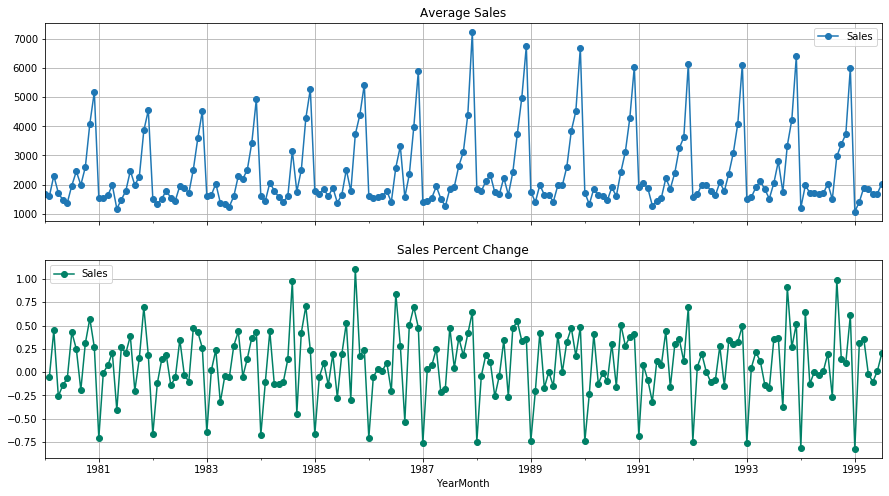

In [174]:
# group by date and get average Sales, and precent change
average    = sparkling.groupby(sparkling.index)["Sales"].mean()
pct_change = sparkling.groupby(sparkling.index)["Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Sales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

The above two graphs tells us the Average 'RetailSales' and the Percentage change of 'RetailSales' with respect to the time.

### Yearly Plot

In [15]:
sparkling_yearly=sparkling[sparkling.index.year<1995].resample('A').sum()
sparkling_yearly.head()

Sales
YearMonth        
1980-12-31  28406
1981-12-31  26227
1982-12-31  25321
1983-12-31  26180
1984-12-31  28431

In [18]:
plt.rcParams['figure.figsize'] = 10,6

Text(0.5, 1.0, 'Sum of Sales each year')

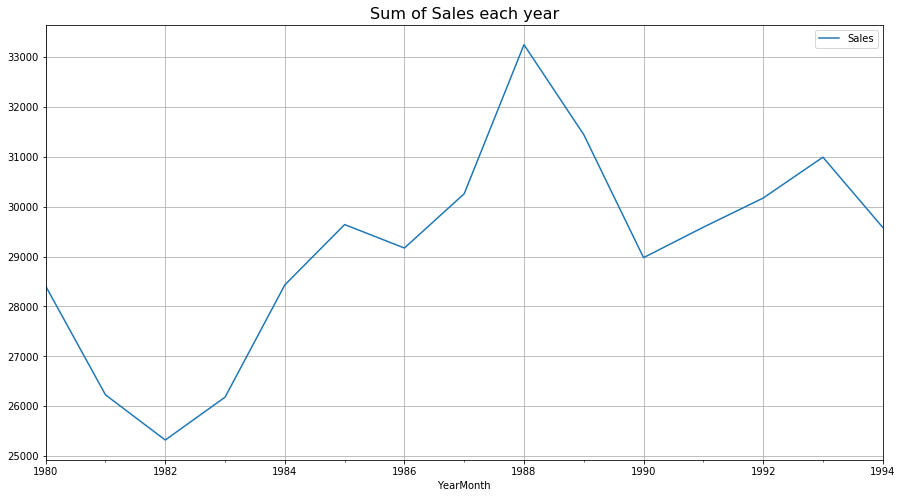

In [545]:
sparkling_yearly.plot()
plt.grid()
plt.title('Sum of Sales each year',fontsize=16)

Text(0.5, 1.0, 'Average Sales each year')

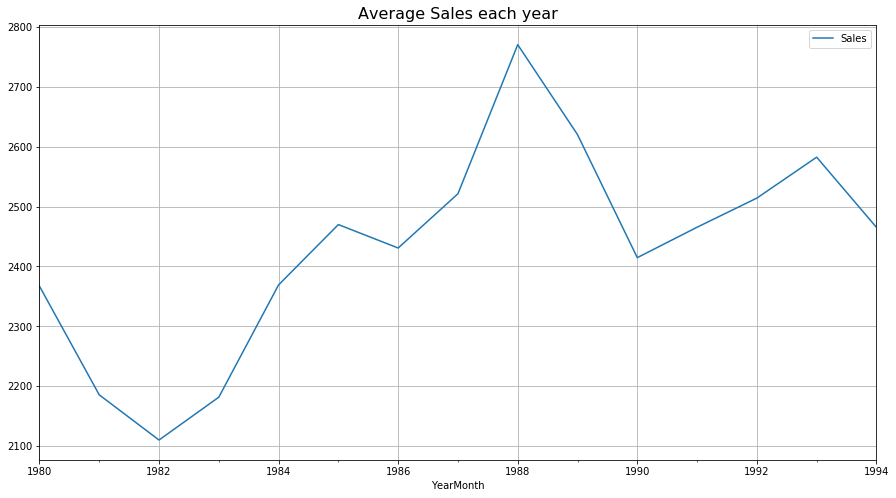

In [544]:
sparkling_yearly_avg=sparkling[sparkling.index.year<1995].resample('A').mean()
sparkling_yearly_avg.plot()
plt.grid()
plt.title('Average Sales each year',fontsize=16)

### Quarterly Plot

Text(0.5, 1.0, 'Sum of Sales each quarter')

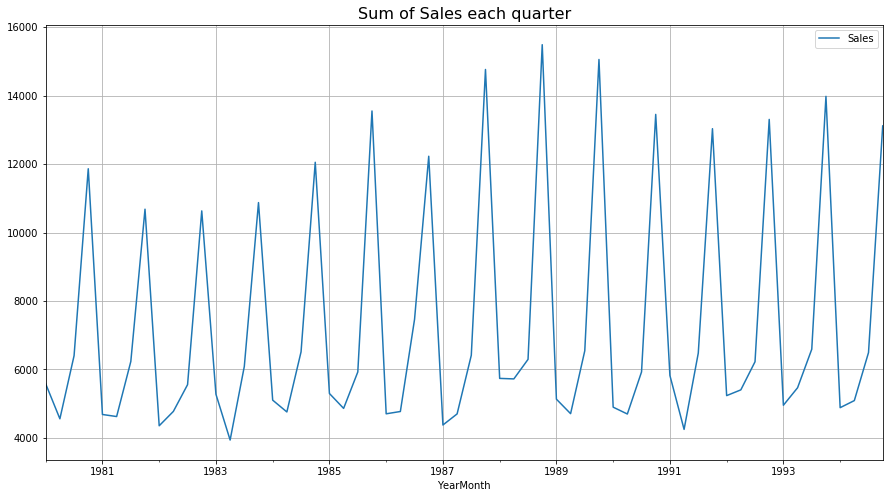

In [543]:
sparkling_quarterly=sparkling[sparkling.index.year<1995].resample('Q').sum()
sparkling_quarterly.plot()
plt.grid()
plt.title('Sum of Sales each quarter',fontsize=16)

Text(0.5, 1.0, 'Avg Sales each quarter')

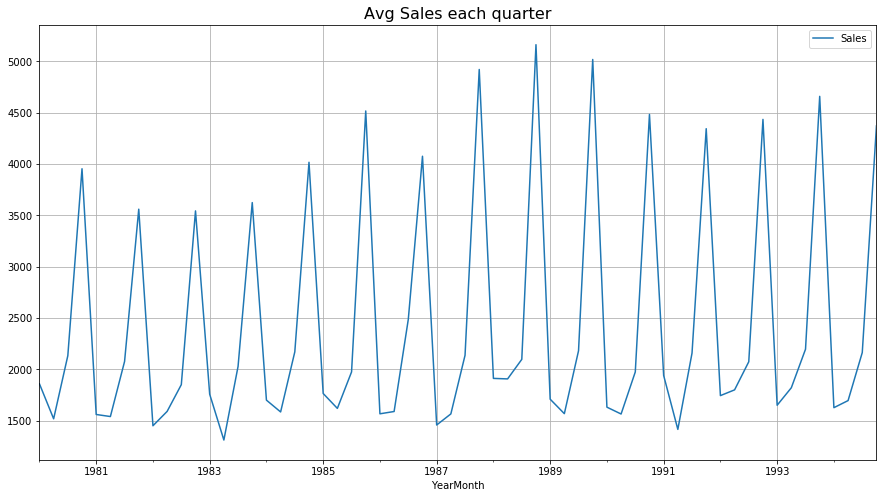

In [542]:
sparkling_quarterly_avg=sparkling[sparkling.index.year<1995].resample('Q').mean()
sparkling_quarterly_avg.plot()
plt.grid()
plt.title('Avg Sales each quarter',fontsize=16)

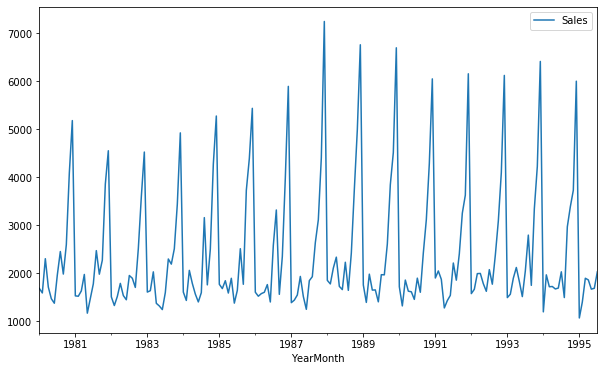

In [27]:
sparkling.plot()

In [48]:
quarter=['Q1','Q2','Q3','Q4']
sparkling_quarterly['Quarter']=quarter*15
sparkling_quarterly

Sales Quarter
YearMonth                
1980-03-31   5581      Q1
1980-06-30   4560      Q2
1980-09-30   6403      Q3
1980-12-31  11862      Q4
1981-03-31   4686      Q1
1981-06-30   4626      Q2
1981-09-30   6234      Q3
1981-12-31  10681      Q4
1982-03-31   4357      Q1
1982-06-30   4776      Q2
1982-09-30   5557      Q3
1982-12-31  10631      Q4
1983-03-31   5277      Q1
1983-06-30   3940      Q2
1983-09-30   6089      Q3
1983-12-31  10874      Q4
1984-03-31   5105      Q1
1984-06-30   4760      Q2
1984-09-30   6515      Q3
1984-12-31  12051      Q4
1985-03-31   5299      Q1
1985-06-30   4864      Q2
1985-09-30   5928      Q3
1985-12-31  13549      Q4
1986-03-31   4706      Q1
1986-06-30   4773      Q2
1986-09-30   7464      Q3
1986-12-31  12227      Q4
1987-03-31   4379      Q1
1987-06-30   4703      Q2
1987-09-30   6415      Q3
1987-12-31  14761      Q4
1988-03-31   5740      Q1
1988-06-30   5725      Q2
1988-09-30   6296      Q3
1988-12-31  15485      Q4
1989-03-31   5133      Q1
1989-06-30   4710      Q2
1989-09-30   6547      Q3
1989-12-31  15053      Q4
1990-03-31   4900      Q1
1990-06-30   4700      Q2
1990-09-30   5928      Q3
1990-12-31  13449      Q4
1991-03-31   5825      Q1
1991-06-30   4251      Q2
1991-09-30   6479      Q3
1991-12-31  13032      Q4
1992-03-31   5237      Q1
1992-06-30   5405      Q2
1992-09-30   6226      Q3
1992-12-31  13303      Q4
1993-03-31   4956      Q1
1993-06-30   5467      Q2
1993-09-30   6592      Q3
1993-12-31  13976      Q4
1994-03-31   4885      Q1
1994-06-30   5092      Q2
1994-09-30   6494      Q3
1994-12-31  13113      Q4

In [49]:
quarterly_turnover = pd.pivot_table(sparkling_quarterly, values = "Sales", columns = "Quarter", index = sparkling_quarterly.index.year)
quarterly_turnover

Quarter      Q1    Q2    Q3     Q4
YearMonth                         
1980       5581  4560  6403  11862
1981       4686  4626  6234  10681
1982       4357  4776  5557  10631
1983       5277  3940  6089  10874
1984       5105  4760  6515  12051
1985       5299  4864  5928  13549
1986       4706  4773  7464  12227
1987       4379  4703  6415  14761
1988       5740  5725  6296  15485
1989       5133  4710  6547  15053
1990       4900  4700  5928  13449
1991       5825  4251  6479  13032
1992       5237  5405  6226  13303
1993       4956  5467  6592  13976
1994       4885  5092  6494  13113

Text(0, 0.5, 'Total Sales')

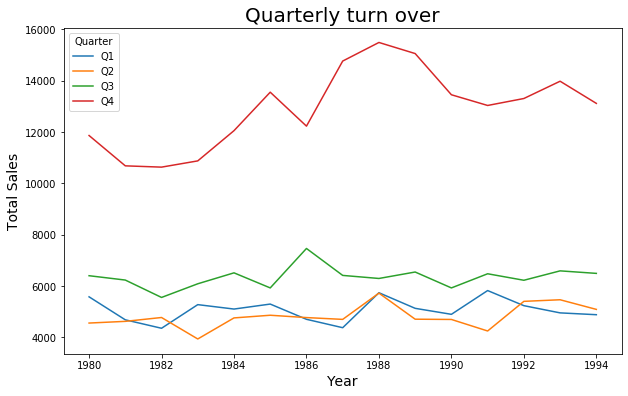

In [52]:
quarterly_turnover.plot()
plt.title('Quarterly turn over',fontsize=20)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Total Sales',fontsize=14)

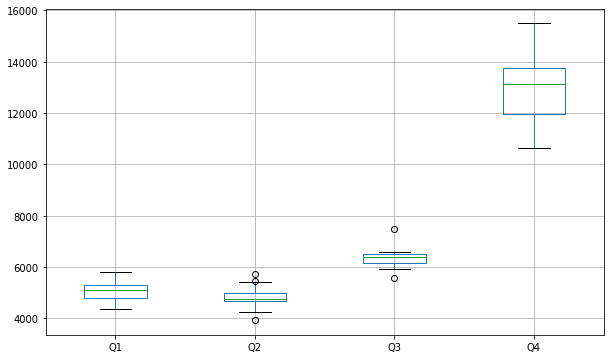

In [51]:
quarterly_turnover.boxplot()

In [30]:
#Turn over is high in Quarter 4

### Time Series Lag Scatter Plots

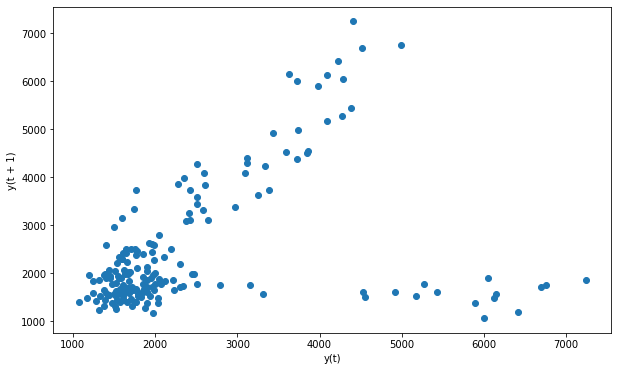

In [28]:
from pandas.plotting import lag_plot
lag_plot(sparkling.Sales)

In [ ]:
#For some higher sales values, there is a significant difference between sales value at prvious time point.
#Sales value is not completely correlated

### Decompose the Time Series and plot the different components.

In [32]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

### Additive Decomposition

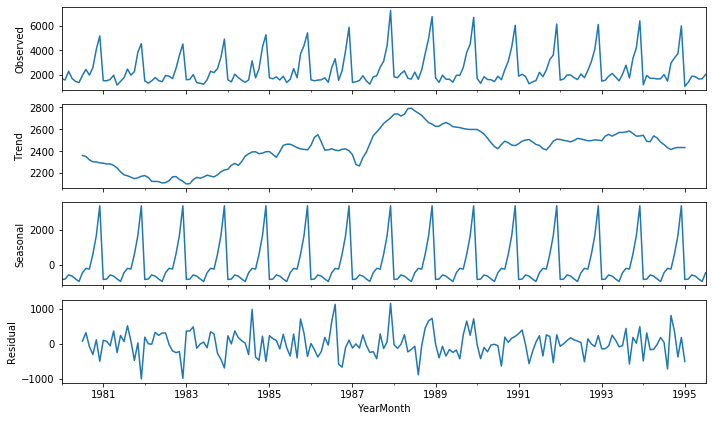

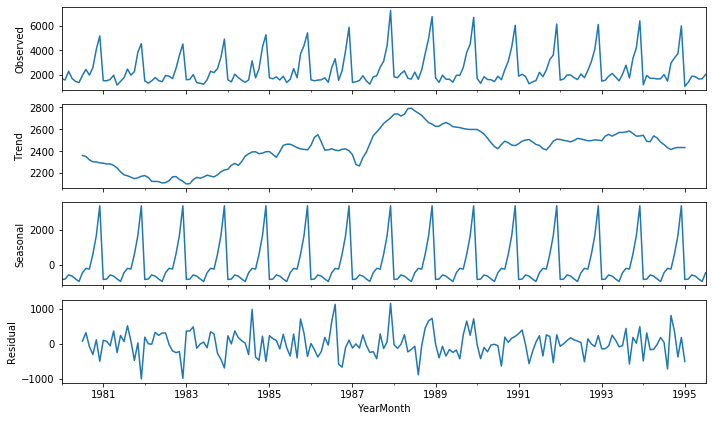

In [35]:
decomposition=seasonal_decompose(sparkling['Sales'],model='additive',freq=12)
decomposition.plot()

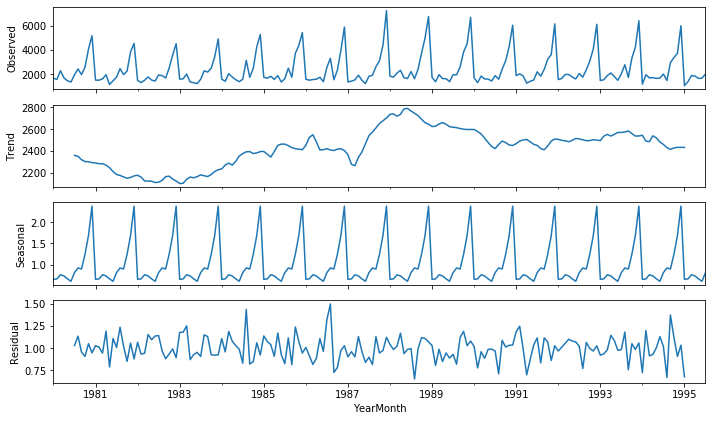

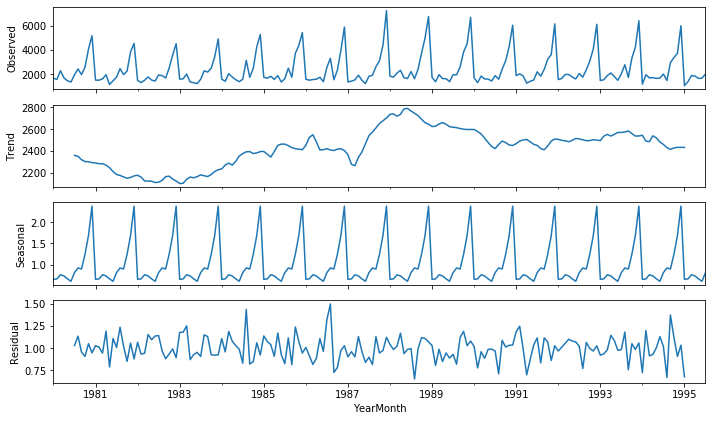

In [36]:
decomposition=seasonal_decompose(sparkling['Sales'],model='multiplicative',freq=12)
decomposition.plot()

In [184]:
# Here seasoonality is additive

## 3. Split the data into training and test. The test data should start in 1991.

In [199]:
train=sparkling[sparkling.index.year<1991]['Sales']
test=sparkling[sparkling.index.year>1990]['Sales']

In [200]:
train.shape

(132,)

In [201]:
test.shape

(55,)

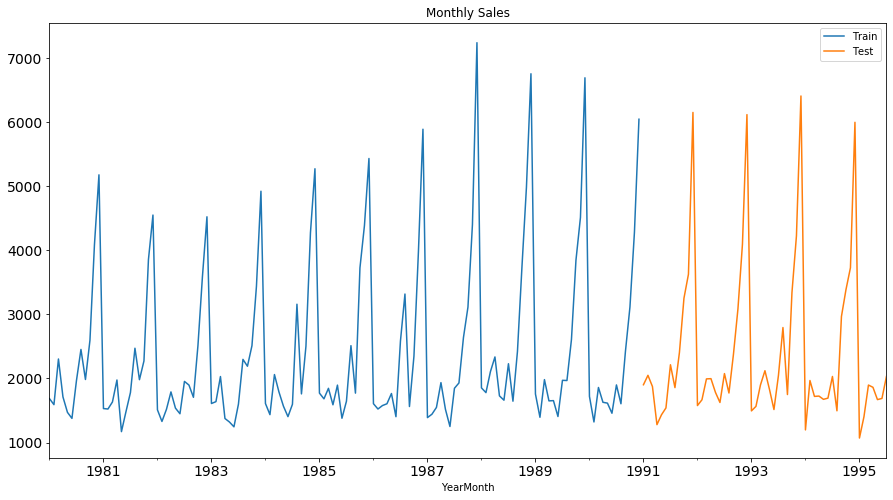

In [202]:
train.plot(figsize=(15,8), title= 'Monthly Sales', fontsize=14,label='Train')
test.plot(figsize=(15,8), title= 'Monthly Sales', fontsize=14,label='Test')
plt.legend()

### Functions to calculate accuracy metrics

In [203]:
from sklearn import metrics

In [204]:
## Mean Absolute Percentage Error 
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [205]:
def calculate_metrics(y,yhat):
    rmse=metrics.mean_squared_error(y,yhat,squared=False)
    mape=MAPE(y,yhat)
    return rmse,mape

### 4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE. - Please do try to build as many models as possible and as many iterations of models as possible with different parameters.

## Model 1: Linear Regression

In [206]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [208]:
lr_train=pd.DataFrame(train.copy())
lr_test=pd.DataFrame(test.copy())

In [209]:
lr_train['Time']=train_time
lr_test['Time']=test_time

In [210]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(np.array(lr_train['Time']).reshape(-1,1),lr_train['Sales'])


LinearRegression()

In [211]:
lr_train['Predict']=lr.predict(np.array(lr_train['Time']).reshape(-1,1))
lr_test['Predict']=lr.predict(np.array(lr_test['Time']).reshape(-1,1))

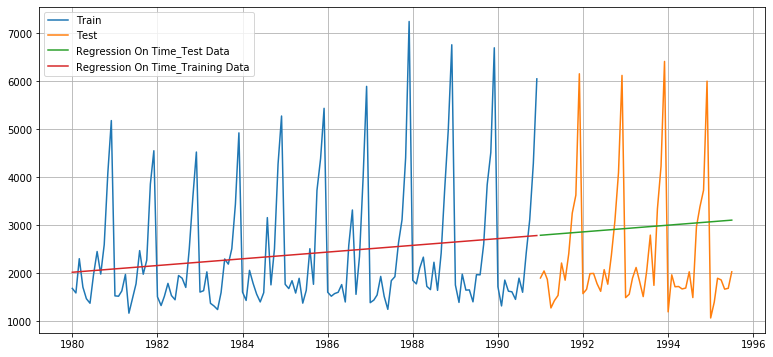

In [212]:
plt.figure(figsize=(13,6))
plt.plot( lr_train['Sales'], label='Train')
plt.plot(lr_test['Sales'], label='Test')
plt.plot(lr_test['Predict'], label='Regression On Time_Test Data')
plt.plot(lr_train['Predict'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.grid();

In [214]:
rmse,mape=calculate_metrics(lr_train['Sales'],lr_train['Predict'])
resultsDf = pd.DataFrame({'Test RMSE': [rmse],'Test MAPE': [mape]},index=['RegressionOnTime'])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1279.322346      40.05

## Method 2: Regression on Time With Seasonal Components

In [215]:
lr_mon_seasonality_train=pd.DataFrame(train.copy())
lr_mon_seasonality_test=pd.DataFrame(test.copy())
lr_mon_seasonality_train['Time']=train_time
lr_mon_seasonality_test['Time']=test_time

In [216]:
month_seasonality='m1 m2 m3 m4 m5 m6 m7 m8 m9 m10 m11 m12'.split()
lr_mon_seasonality_train['MonthSeasonality']=month_seasonality*11
lr_mon_seasonality_test['MonthSeasonality']='m1 m2 m3 m4 m5 m6 m7 m8 m9 m10 m11 m12 m1 m2 m3 m4 m5 m6 m7 m8 m9 m10 m11 m12 m1 m2 m3 m4 m5 m6 m7 m8 m9 m10 m11 m12 m1 m2 m3 m4 m5 m6 m7 m8 m9 m10 m11 m12 m1 m2 m3 m4 m5 m6 m7'.split()

In [217]:
lr_mon_seasonality_train=pd.get_dummies(lr_mon_seasonality_train,drop_first=True)
lr_mon_seasonality_test=pd.get_dummies(lr_mon_seasonality_test,drop_first=True)

In [218]:
x_train=lr_mon_seasonality_train.drop('Sales',axis=1)
y_train=lr_mon_seasonality_train.Sales
x_test=lr_mon_seasonality_test.drop('Sales',axis=1)
y_test=lr_mon_seasonality_test.Sales

lr_seas_model= LinearRegression()
lr_seas_model.fit(x_train, y_train)

LinearRegression()

In [219]:
lr_mon_seasonality_train['Predict']=lr_seas_model.predict(x_train)
lr_mon_seasonality_test['Predict']=lr_seas_model.predict(x_test)

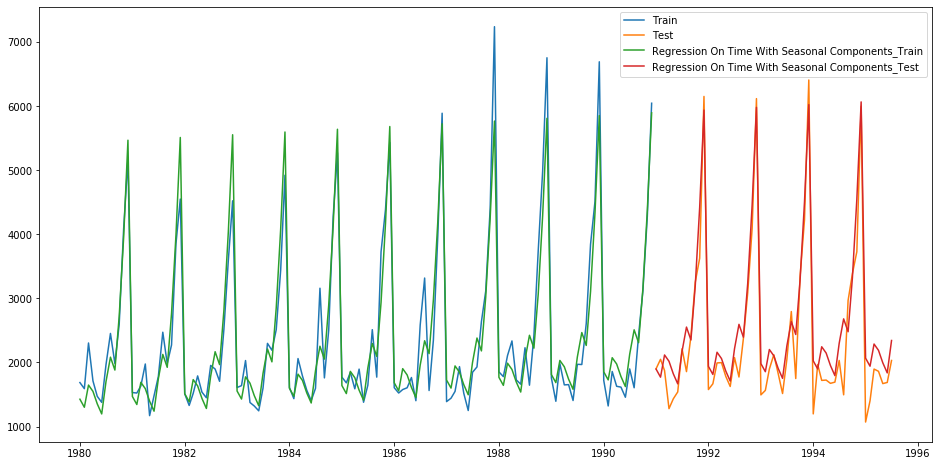

In [220]:
plt.figure(figsize=(16,8))
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(lr_mon_seasonality_train['Predict'], label='Regression On Time With Seasonal Components_Train')
plt.plot(lr_mon_seasonality_test['Predict'], label='Regression On Time With Seasonal Components_Test')
plt.legend(loc='best')

In [221]:
rmse,mape=calculate_metrics(lr_mon_seasonality_test['Sales'],lr_mon_seasonality_test['Predict'])
tempResultsDf = pd.DataFrame({'Test RMSE': [rmse], 'Test MAPE' : [mape]},index=['RegressionOnTimeSeasonal'])
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime          1279.322346      40.05
RegressionOnTimeSeasonal   420.866517      13.29

## Naive Approach: $\hat{y}_{t+1} = y_t$

In [222]:
naive_test=pd.DataFrame(test.copy())

In [223]:
naive_test['Predict']=train[len(train)-1]

In [546]:
naive_test['Predict']

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
1991-06-01    6047
1991-07-01    6047
1991-08-01    6047
1991-09-01    6047
1991-10-01    6047
1991-11-01    6047
1991-12-01    6047
1992-01-01    6047
1992-02-01    6047
1992-03-01    6047
1992-04-01    6047
1992-05-01    6047
1992-06-01    6047
1992-07-01    6047
1992-08-01    6047
1992-09-01    6047
1992-10-01    6047
1992-11-01    6047
1992-12-01    6047
1993-01-01    6047
1993-02-01    6047
1993-03-01    6047
1993-04-01    6047
1993-05-01    6047
1993-06-01    6047
1993-07-01    6047
1993-08-01    6047
1993-09-01    6047
1993-10-01    6047
1993-11-01    6047
1993-12-01    6047
1994-01-01    6047
1994-02-01    6047
1994-03-01    6047
1994-04-01    6047
1994-05-01    6047
1994-06-01    6047
1994-07-01    6047
1994-08-01    6047
1994-09-01    6047
1994-10-01    6047
1994-11-01    6047
1994-12-01    6047
1995-01-01    6047
1995-02-01    6047
1995-03-01    6047
1995-04-01    6047
19

Text(0.5, 1.0, 'Naive Forecast')

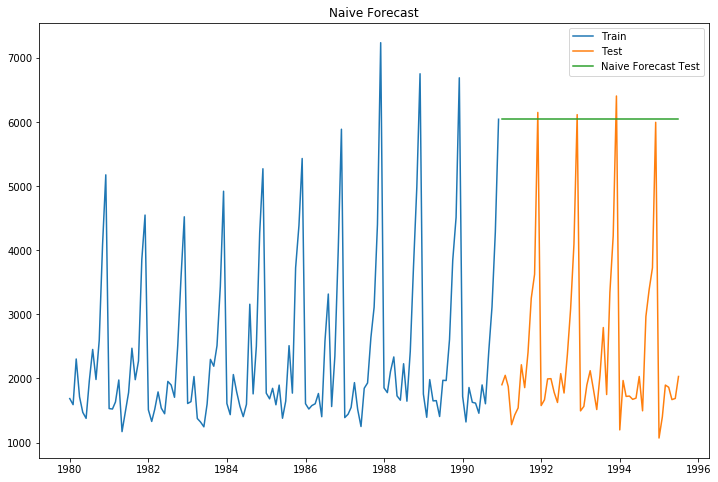

In [224]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train, label='Train')
plt.plot(test.index,test, label='Test')
plt.plot(naive_test.index,naive_test['Predict'], label='Naive Forecast Test')
plt.legend(loc='best')
plt.title("Naive Forecast")

In [225]:
rmse,mape=calculate_metrics(naive_test['Sales'],naive_test['Predict'])
tempResultsDf = pd.DataFrame({'Test RMSE': [rmse], 'Test MAPE' : [mape]},index=['Naive'])
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime          1279.322346      40.05
RegressionOnTimeSeasonal   420.866517      13.29
Naive                     3864.279352     152.87

### Simple Average

In [226]:
simple_avg_train=pd.DataFrame(train.copy())
simple_avg_test=pd.DataFrame(test.copy())
simple_avg_train['Predict'] = train.mean()
simple_avg_train.head()

Sales      Predict
YearMonth                     
1980-01-01   1686  2403.780303
1980-02-01   1591  2403.780303
1980-03-01   2304  2403.780303
1980-04-01   1712  2403.780303
1980-05-01   1471  2403.780303

In [227]:
simple_avg_test['Predict'] = train.mean()
simple_avg_test.head()

Sales      Predict
YearMonth                     
1991-01-01   1902  2403.780303
1991-02-01   2049  2403.780303
1991-03-01   1874  2403.780303
1991-04-01   1279  2403.780303
1991-05-01   1432  2403.780303

Text(0.5, 1.0, 'Simple Average Forecast')

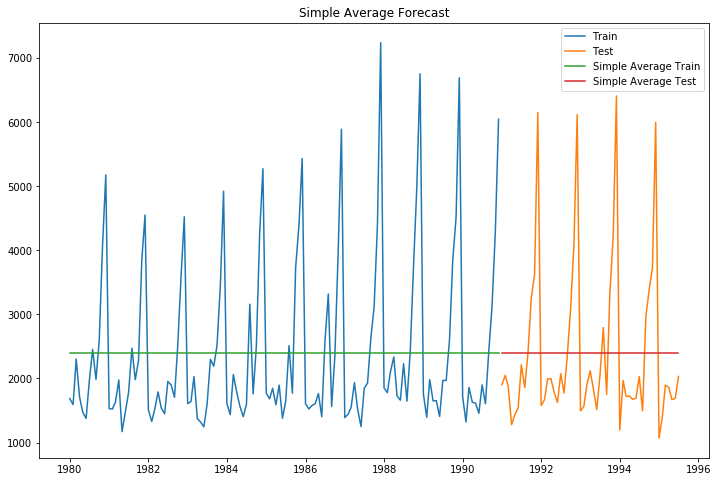

In [228]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train, label='Train')
plt.plot(test.index,test, label='Test')
plt.plot(simple_avg_train.index,simple_avg_train['Predict'], label='Simple Average Train')
plt.plot(simple_avg_test.index,simple_avg_test['Predict'], label='Simple Average Test')
plt.legend(loc='best')
plt.title("Simple Average Forecast")

In [230]:
rmse,mape=calculate_metrics(simple_avg_test['Sales'],simple_avg_test['Predict'])
tempResultsDf = pd.DataFrame({'Test RMSE': [rmse], 'Test MAPE' : [mape]},index=['SimpleAvg'])
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime          1279.322346      40.05
RegressionOnTimeSeasonal   420.866517      13.29
Naive                     3864.279352     152.87
SimpleAvg                 1275.081804      38.90

## Moving Average(MA)

In [231]:
MovingAverage = sparkling.copy()
MovingAverage.head()

Sales
YearMonth        
1980-01-01   1686
1980-02-01   1591
1980-03-01   2304
1980-04-01   1712
1980-05-01   1471

In [232]:
MovingAverage['Trailing_2'] = MovingAverage['Sales'].rolling(2).mean()
MovingAverage['Trailing_3'] = MovingAverage['Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sales'].rolling(9).mean()

MovingAverage.tail()

Sales  Trailing_2  Trailing_3   Trailing_6   Trailing_9
YearMonth                                                          
1995-03-01   1897      1649.5     2592.00  2913.666667  2664.000000
1995-04-01   1862      1879.5     1557.75  2659.833333  2645.222222
1995-05-01   1670      1766.0     1707.75  2316.666667  2664.666667
1995-06-01   1688      1679.0     1779.25  1598.166667  2522.444444
1995-07-01   2031      1859.5     1812.75  1758.333333  2372.000000

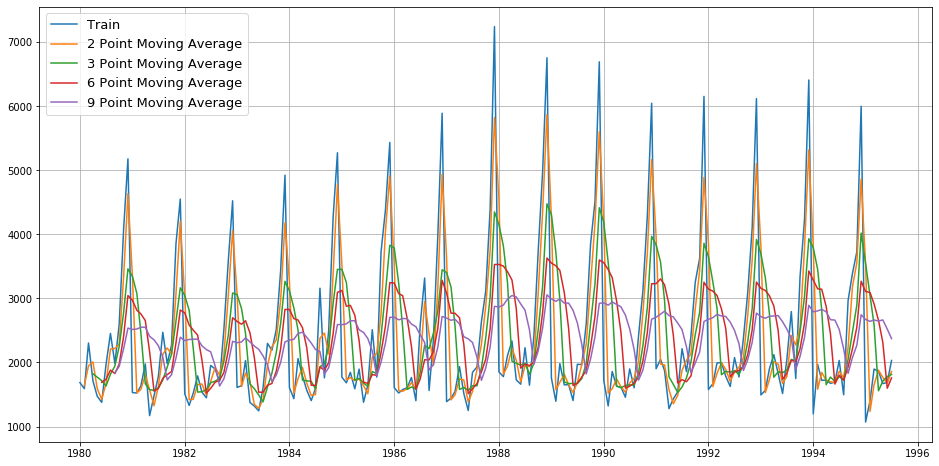

In [235]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_3'], label='3 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best',fontsize=13)
plt.grid();

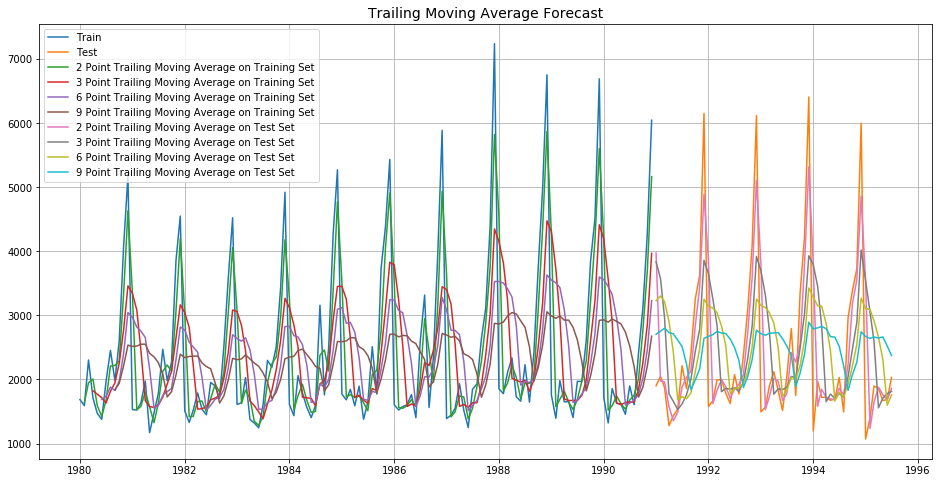

In [237]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year<1991]
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year>1990]

## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Sales'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_3'], label='3 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_3'], label='3 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.title('Trailing Moving Average Forecast',fontsize=14)
plt.legend(loc = 'best')
plt.grid();

In [238]:
rmse,mape=calculate_metrics(trailing_MovingAverage_test['Sales'],trailing_MovingAverage_test['Trailing_2'])
tempResultsDf = pd.DataFrame({'Test RMSE': [rmse], 'Test MAPE' : [mape]},index=['Trailing_MA_2'])
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime          1279.322346      40.05
RegressionOnTimeSeasonal   420.866517      13.29
Naive                     3864.279352     152.87
SimpleAvg                 1275.081804      38.90
Trailing_MA_2              813.400684      19.70

In [239]:
rmse,mape=calculate_metrics(trailing_MovingAverage_test['Sales'],trailing_MovingAverage_test['Trailing_3'])
tempResultsDf = pd.DataFrame({'Test RMSE': [rmse], 'Test MAPE' : [mape]},index=['Trailing_MA_3'])
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime          1279.322346      40.05
RegressionOnTimeSeasonal   420.866517      13.29
Naive                     3864.279352     152.87
SimpleAvg                 1275.081804      38.90
Trailing_MA_2              813.400684      19.70
Trailing_MA_3             1156.589694      35.96

In [240]:
rmse,mape=calculate_metrics(trailing_MovingAverage_test['Sales'],trailing_MovingAverage_test['Trailing_6'])
tempResultsDf = pd.DataFrame({'Test RMSE': [rmse], 'Test MAPE' : [mape]},index=['Trailing_MA_6'])
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime          1279.322346      40.05
RegressionOnTimeSeasonal   420.866517      13.29
Naive                     3864.279352     152.87
SimpleAvg                 1275.081804      38.90
Trailing_MA_2              813.400684      19.70
Trailing_MA_3             1156.589694      35.96
Trailing_MA_6             1283.927428      43.86

In [241]:
rmse,mape=calculate_metrics(trailing_MovingAverage_test['Sales'],trailing_MovingAverage_test['Trailing_9'])
tempResultsDf = pd.DataFrame({'Test RMSE': [rmse], 'Test MAPE' : [mape]},index=['Trailing_MA_9'])
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime          1279.322346      40.05
RegressionOnTimeSeasonal   420.866517      13.29
Naive                     3864.279352     152.87
SimpleAvg                 1275.081804      38.90
Trailing_MA_2              813.400684      19.70
Trailing_MA_3             1156.589694      35.96
Trailing_MA_6             1283.927428      43.86
Trailing_MA_9             1346.278315      46.86

## Compare various Time Series Plots

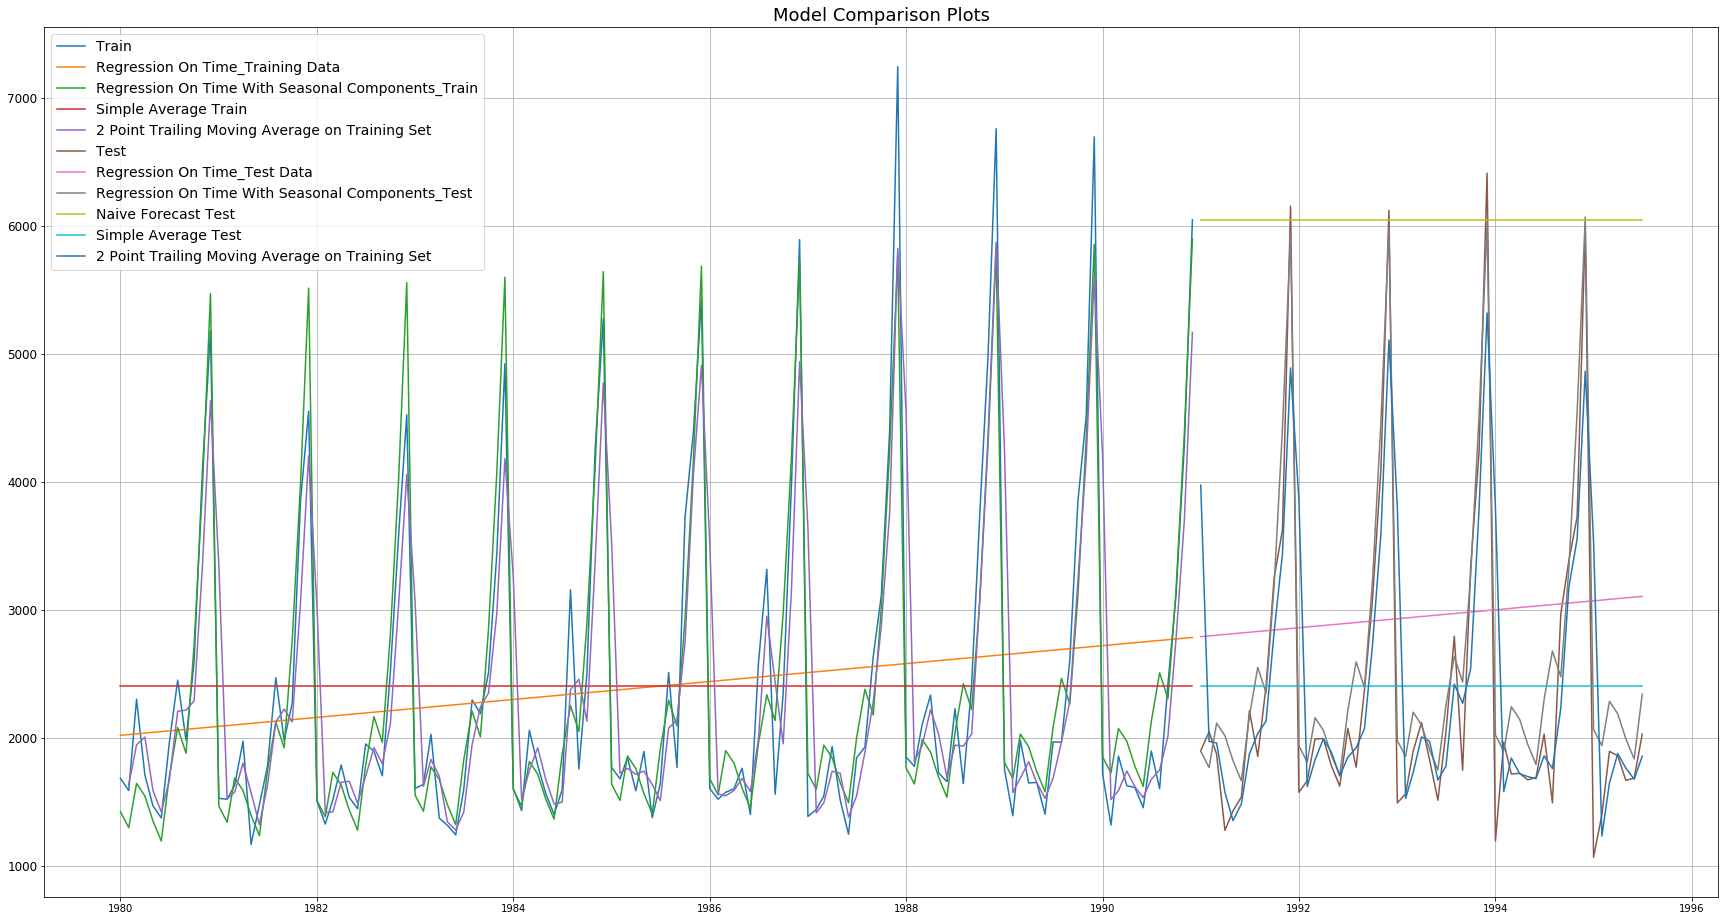

In [245]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,16))
plt.plot(train, label='Train')


plt.plot(lr_train['Predict'], label='Regression On Time_Training Data')
plt.plot(lr_mon_seasonality_train['Predict'], label='Regression On Time With Seasonal Components_Train')
plt.plot(simple_avg_train.index,simple_avg_train['Predict'], label='Simple Average Train')
plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')

plt.plot(test, label='Test')

plt.plot(lr_test['Predict'], label='Regression On Time_Test Data')
plt.plot(lr_mon_seasonality_test['Predict'], label='Regression On Time With Seasonal Components_Test')
plt.plot(naive_test.index,naive_test['Predict'], label='Naive Forecast Test')
plt.plot(simple_avg_test.index,simple_avg_test['Predict'], label='Simple Average Test')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')

plt.legend(loc='best',fontsize=14)
plt.title("Model Comparison Plots",fontsize=18)
plt.yticks(fontsize=12)
plt.grid();

In [246]:
resultsDf.sort_values('Test RMSE')

Test RMSE  Test MAPE
RegressionOnTimeSeasonal   420.866517      13.29
Trailing_MA_2              813.400684      19.70
Trailing_MA_3             1156.589694      35.96
SimpleAvg                 1275.081804      38.90
RegressionOnTime          1279.322346      40.05
Trailing_MA_6             1283.927428      43.86
Trailing_MA_9             1346.278315      46.86
Naive                     3864.279352     152.87

## Simple Exponential Smoothing

In [247]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [248]:
SES_train = pd.DataFrame(train.copy())
SES_test = pd.DataFrame(test.copy())

In [261]:
model_SES = SimpleExpSmoothing(SES_train['Sales'])

C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [250]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

In [251]:
model_SES_autofit.params

{'smoothing_level': 0.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2403.785621547663,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [252]:
SES_train['Predict'] = model_SES_autofit.fittedvalues
SES_train.head()

Sales      Predict
YearMonth                     
1980-01-01   1686  2403.785622
1980-02-01   1591  2403.785622
1980-03-01   2304  2403.785622
1980-04-01   1712  2403.785622
1980-05-01   1471  2403.785622

In [254]:
SES_train.tail()

Sales      Predict
YearMonth                     
1990-08-01   1605  2403.785622
1990-09-01   2424  2403.785622
1990-10-01   3116  2403.785622
1990-11-01   4286  2403.785622
1990-12-01   6047  2403.785622

In [256]:
SES_test['Predict'] = model_SES_autofit.forecast(steps=55)
SES_test.head()

Sales      predict      Predict
YearMonth                                  
1991-01-01   1902  2403.785622  2403.785622
1991-02-01   2049  2403.785622  2403.785622
1991-03-01   1874  2403.785622  2403.785622
1991-04-01   1279  2403.785622  2403.785622
1991-05-01   1432  2403.785622  2403.785622

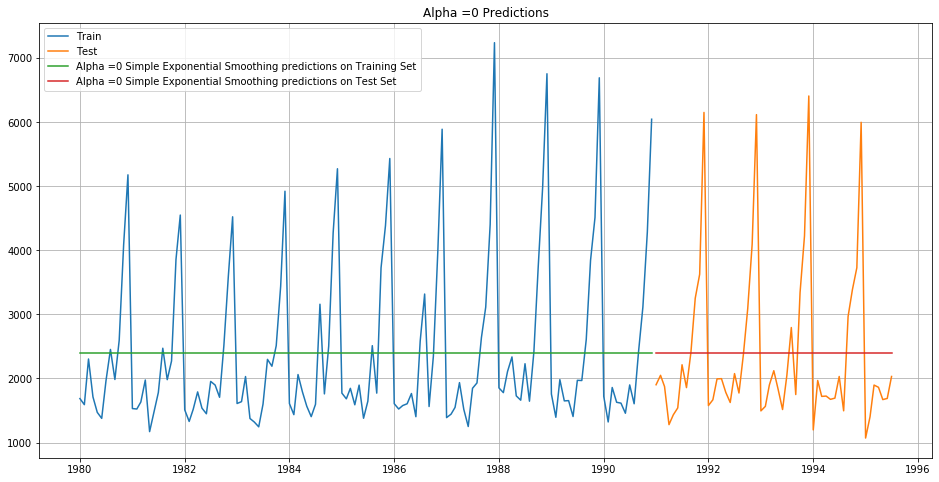

In [257]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sales'], label='Train')
plt.plot(SES_test['Sales'], label='Test')

plt.plot(SES_train['Predict'], label='Alpha =0 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['Predict'], label='Alpha =0 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0 Predictions');

In [258]:
rmse,mape=calculate_metrics(SES_test['Sales'],SES_test['Predict'])
tempResultsDf = pd.DataFrame({'Test RMSE': [rmse], 'Test MAPE' : [mape]},index=['SES Alpha=0'])
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime          1279.322346      40.05
RegressionOnTimeSeasonal   420.866517      13.29
Naive                     3864.279352     152.87
SimpleAvg                 1275.081804      38.90
Trailing_MA_2              813.400684      19.70
Trailing_MA_3             1156.589694      35.96
Trailing_MA_6             1283.927428      43.86
Trailing_MA_9             1346.278315      46.86
SEC_alpha=0               1275.081823      38.90

In [259]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_SES = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_SES

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [ ]:
#model_SES = SimpleExpSmoothing(SES_train['Sales'])

In [279]:
for i in np.arange(0,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=True,use_brute=True)
    SES_train['Predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['Predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_SES_train_i = metrics.mean_squared_error(SES_train['Sales'],SES_train['Predict',i],squared=False)
    mape_SES_train_i = MAPE(SES_train['Sales'],SES_train['Predict',i])
    
    rmse_SES_test_i = metrics.mean_squared_error(SES_test['Sales'],SES_test['Predict',i],squared=False)
    mape_SES_test_i = MAPE(SES_test['Sales'],SES_test['Predict',i])
    
    resultsDf_SES = resultsDf_SES.append({'Alpha Values':i,'Train RMSE':rmse_SES_train_i 
                                      ,'Train MAPE': mape_SES_train_i,'Test RMSE':rmse_SES_test_i
                                      ,'Test MAPE':mape_SES_test_i}, ignore_index=True)

In [281]:
resultsDf_SES.sort_values('Test RMSE')

Alpha Values   Train RMSE  Train MAPE    Test RMSE  Test MAPE
0            0.0  1298.483628       40.36  1275.081846      38.90
10           0.0  1298.483628       40.36  1275.081846      38.90
8            0.0  1298.483628       40.36  1275.081846      38.90
7            0.0  1298.483628       40.36  1275.081846      38.90
6            0.0  1298.483628       40.36  1275.081846      38.90
9            0.0  1298.483628       40.36  1275.081846      38.90
4            0.0  1298.483628       40.36  1275.081846      38.90
3            0.0  1298.483628       40.36  1275.081846      38.90
2            0.0  1298.483628       40.36  1275.081846      38.90
1            0.0  1298.483628       40.36  1275.081846      38.90
5            0.0  1298.483628       40.36  1275.081846      38.90
20           0.0  1298.483628       40.36  1275.081846      38.90
21           0.1  1331.786996       42.30  1375.393526      49.53
11           0.1  1331.786996       42.30  1375.393526      49.53
12           0.2  1355.645334       43.91  1595.206839      60.46
22           0.2  1355.645334       43.91  1595.206839      60.46
13           0.3  1359.422162       43.80  1935.507132      75.66
23           0.3  1359.422162       43.80  1935.507132      75.66
24           0.4  1352.562367       42.79  2311.919615      91.55
14           0.4  1352.562367       42.79  2311.919615      91.55
15           0.5  1343.994119       41.18  2666.351413     106.27
25           0.5  1343.994119       41.18  2666.351413     106.27
16           0.6  1338.801428       39.81  2979.204388     118.77
26           0.6  1338.801428       39.81  2979.204388     118.77
17           0.7  1338.843298       38.56  3249.944092     129.34
27           0.7  1338.843298       38.56  3249.944092     129.34
18           0.8  1344.462035       37.60  3483.801006     138.34
28           0.8  1344.462035       37.60  3483.801006     138.34
19           0.9  1355.723493       36.79  3686.794285     146.08
29           0.9  1355.723493       36.79  3686.794285     146.08

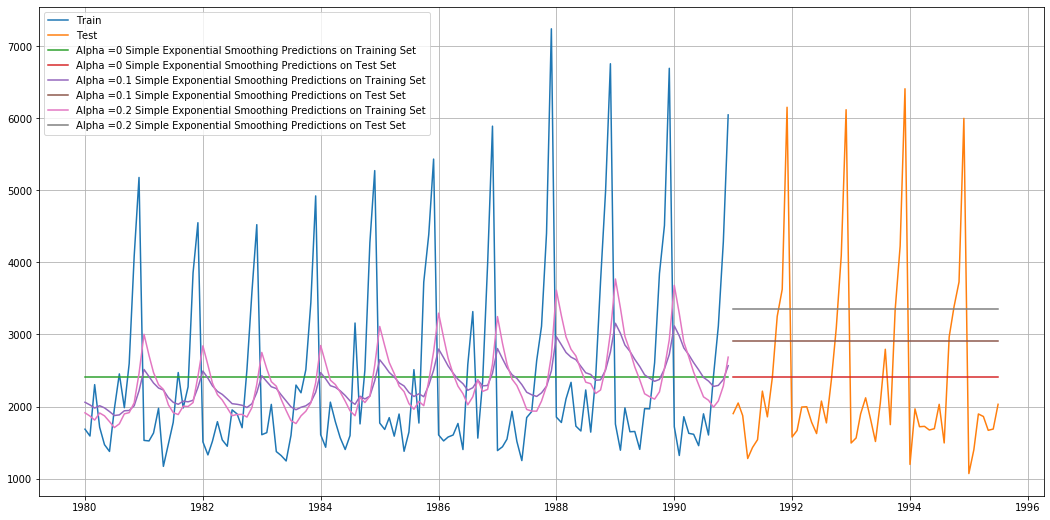

In [283]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sales'], label='Train')
plt.plot(SES_test['Sales'], label='Test')

plt.plot(SES_train['Predict'], label='Alpha =0 Simple Exponential Smoothing Predictions on Training Set')
plt.plot(SES_test['Predict'], label='Alpha =0 Simple Exponential Smoothing Predictions on Test Set')

plt.plot(SES_train['Predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing Predictions on Training Set')
plt.plot(SES_test['Predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing Predictions on Test Set')

plt.plot(SES_train['Predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing Predictions on Training Set')
plt.plot(SES_test['Predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing Predictions on Test Set')


plt.legend(loc='best')
plt.grid();

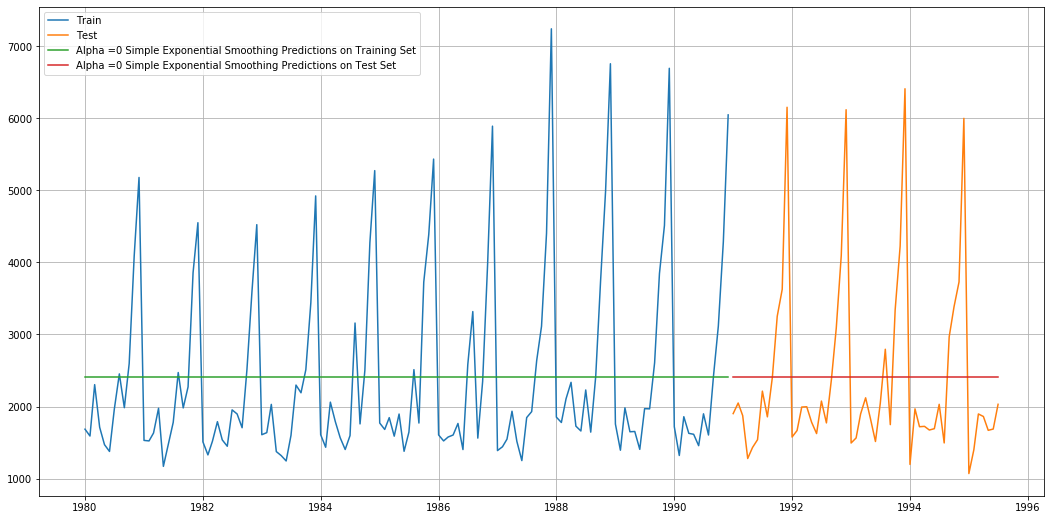

In [547]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sales'], label='Train')
plt.plot(SES_test['Sales'], label='Test')

plt.plot(SES_train['Predict'], label='Alpha =0 Simple Exponential Smoothing Predictions on Training Set')
plt.plot(SES_test['Predict'], label='Alpha =0 Simple Exponential Smoothing Predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [286]:
resultsDf_SES_1 = pd.DataFrame({'Test RMSE': [resultsDf_SES['Test RMSE'][0],resultsDf_SES['Test RMSE'][1]]
                            ,'Test MAPE': [resultsDf_SES['Test MAPE'][0],resultsDf_SES['Test MAPE'][1]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing','Alpha=0.2,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_SES_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                      1279.322346      40.05
RegressionOnTimeSeasonal               420.866517      13.29
Naive                                 3864.279352     152.87
SimpleAvg                             1275.081804      38.90
Trailing_MA_2                          813.400684      19.70
Trailing_MA_3                         1156.589694      35.96
Trailing_MA_6                         1283.927428      43.86
Trailing_MA_9                         1346.278315      46.86
SEC_alpha=0                           1275.081823      38.90
Alpha=0.1,SimpleExponentialSmoothing  1275.081846      38.90
Alpha=0.2,SimpleExponentialSmoothing  1275.081846      38.90

### Double Exponential Smoothing (Holt's Model, Holt's Linear Trend Method)

##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

In [290]:
DES_train = pd.DataFrame(train.copy())
DES_test = pd.DataFrame(test.copy())

In [291]:
model_DES = Holt(DES_train['Sales'])

C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [293]:
model_DES_auto_fit=model_DES.fit(optimized=True,use_brute=True)

In [294]:
model_DES_auto_fit.params

{'smoothing_level': 0.6478112025162996,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 1686.0826224342366,
 'initial_slope': 27.064245197810123,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [292]:
resultsDf_DES = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_DES

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [295]:
DES_train['Predict']=model_DES_auto_fit.fittedvalues
DES_test['Predict']=model_DES_auto_fit.forecast(steps=55)

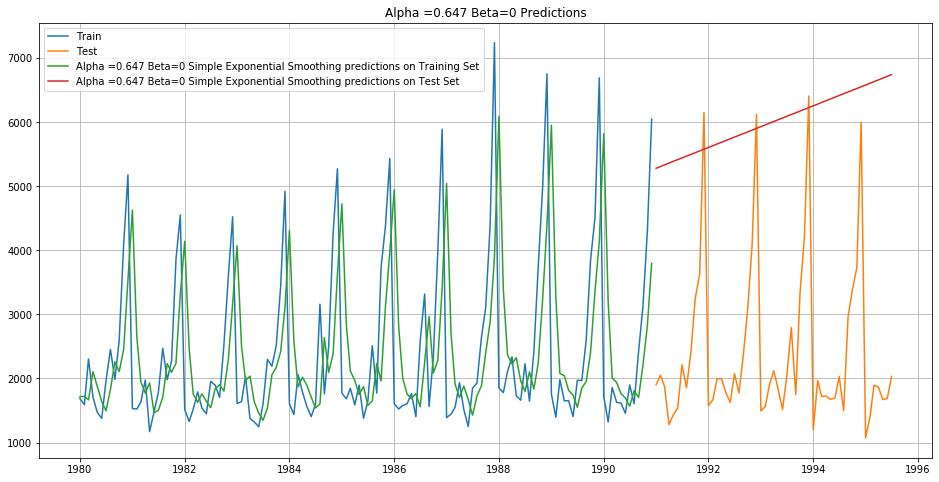

In [297]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(DES_train['Sales'], label='Train')
plt.plot(DES_test['Sales'], label='Test')

plt.plot(DES_train['Predict'], label='Alpha =0.647 Beta=0 Simple Exponential Smoothing predictions on Training Set')
plt.plot(DES_test['Predict'], label='Alpha =0.647 Beta=0 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.647 Beta=0 Predictions');

In [299]:
rmse,mape=calculate_metrics(DES_test['Sales'],DES_test['Predict'])
tempResultsDf = pd.DataFrame({'Test RMSE': [rmse], 'Test MAPE' : [mape]},index=['DES Alpha=0.647,Beta=0'])
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                      1279.322346      40.05
RegressionOnTimeSeasonal               420.866517      13.29
Naive                                 3864.279352     152.87
SimpleAvg                             1275.081804      38.90
Trailing_MA_2                          813.400684      19.70
Trailing_MA_3                         1156.589694      35.96
Trailing_MA_6                         1283.927428      43.86
Trailing_MA_9                         1346.278315      46.86
SEC_alpha=0                           1275.081823      38.90
Alpha=0.1,SimpleExponentialSmoothing  1275.081846      38.90
Alpha=0.2,SimpleExponentialSmoothing  1275.081846      38.90
DES Alpha=0.647,Beta=0                3851.171500     152.07

In [300]:
for i in np.arange(0,1.1,0.1):
    for j in np.arange(0,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_DES_train = metrics.mean_squared_error(DES_train['Sales'],DES_train['predict',i,j],squared=False)
        mape_DES_train = MAPE(DES_train['Sales'],DES_train['predict',i,j])
        
        rmse_DES_test = metrics.mean_squared_error(DES_test['Sales'],DES_test['predict',i,j],squared=False)
        mape_DES_test = MAPE(DES_test['Sales'],DES_test['predict',i,j])
        
        resultsDf_DES = resultsDf_DES.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_DES_train
                                      ,'Train MAPE': mape_DES_train,'Test RMSE':rmse_DES_test
                                      ,'Test MAPE':mape_DES_test}, ignore_index=True)

In [303]:
resultsDf_DES

Alpha Values  Beta Values   Train RMSE  Train MAPE     Test RMSE  \
0             0.0          0.0  1483.667178       35.55   1460.954675   
1             0.0          0.1  1483.667178       35.55   1460.954675   
2             0.0          0.2  1483.667178       35.55   1460.954675   
3             0.0          0.3  1483.667178       35.55   1460.954675   
4             0.0          0.4  1483.667178       35.55   1460.954675   
..            ...          ...          ...         ...           ...   
116           1.0          0.6  1753.362277       45.75  49327.087977   
117           1.0          0.7  1825.157067       47.96  52655.765663   
118           1.0          0.8  1901.992967       50.09  55442.273880   
119           1.0          0.9  1985.351411       52.00  57823.177011   
120           1.0          1.0  2077.647476       53.78  59877.076519   

     Test MAPE  
0        34.41  
1        34.41  
2        34.41  
3        34.41  
4        34.41  
..         ...  
116    1824.42  
117    1945.23  
118    2046.36  
119    2132.75  
120    2207.28  

[121 rows x 6 columns]

In [305]:
resultsDf_DES.sort_values(by=['Test RMSE']).head(15)

Alpha Values  Beta Values   Train RMSE  Train MAPE    Test RMSE  Test MAPE
0            0.0          0.0  1483.667178       35.55  1460.954675      34.41
1            0.0          0.1  1483.667178       35.55  1460.954675      34.41
2            0.0          0.2  1483.667178       35.55  1460.954675      34.41
3            0.0          0.3  1483.667178       35.55  1460.954675      34.41
4            0.0          0.4  1483.667178       35.55  1460.954675      34.41
5            0.0          0.5  1483.667178       35.55  1460.954675      34.41
6            0.0          0.6  1483.667178       35.55  1460.954675      34.41
7            0.0          0.7  1483.667178       35.55  1460.954675      34.41
8            0.0          0.8  1483.667178       35.55  1460.954675      34.41
9            0.0          0.9  1483.667178       35.55  1460.954675      34.41
10           0.0          1.0  1483.667178       35.55  1460.954675      34.41
11           0.1          0.0  1329.944536       43.08  1504.684316      55.99
12           0.1          0.1  1363.474031       44.26  1779.426896      67.23
22           0.2          0.0  1354.458399       44.48  1851.305010      71.66
33           0.3          0.0  1358.400672       44.10  2336.563711      91.99

In [307]:
DES_train

Sales      Predict  (predict, 0.0, 0.0)  (predict, 0.0, 0.1)  \
YearMonth                                                                  
1980-01-01   1686  1713.146868               1686.0               1686.0   
1980-02-01   1591  1722.625068               1686.0               1686.0   
1980-03-01   2304  1664.421120               1686.0               1686.0   
1980-04-01   1712  2105.811728               1686.0               1686.0   
1980-05-01   1471  1877.760324               1686.0               1686.0   
...           ...          ...                  ...                  ...   
1990-08-01   1605  1809.404206               1686.0               1686.0   
1990-09-01   2424  1704.053117               1686.0               1686.0   
1990-10-01   3116  2197.507018               1686.0               1686.0   
1990-11-01   4286  2819.581306               1686.0               1686.0   
1990-12-01   6047  3796.608009               1686.0               1686.0   

            (predict, 0.0, 0.2)  (predict, 0.0, 0.30000000000000004)  \
YearMonth                                                              
1980-01-01               1686.0                               1686.0   
1980-02-01               1686.0                               1686.0   
1980-03-01               1686.0                               1686.0   
1980-04-01               1686.0                               1686.0   
1980-05-01               1686.0                               1686.0   
...                         ...                                  ...   
1990-08-01               1686.0                               1686.0   
1990-09-01               1686.0                               1686.0   
1990-10-01               1686.0                               1686.0   
1990-11-01               1686.0                               1686.0   
1990-12-01               1686.0                               1686.0   

            (predict, 0.0, 0.4)  (predict, 0.0, 0.5)  \
YearMonth                                              
1980-01-01               1686.0               1686.0   
1980-02-01               1686.0               1686.0   
1980-03-01               1686.0               1686.0   
1980-04-01               1686.0               1686.0   
1980-05-01               1686.0               1686.0   
...                         ...                  ...   
1990-08-01               1686.0               1686.0   
1990-09-01               1686.0               1686.0   
1990-10-01               1686.0               1686.0   
1990-11-01               1686.0               1686.0   
1990-12-01               1686.0               1686.0   

            (predict, 0.0, 0.6000000000000001)  \
YearMonth                                        
1980-01-01                              1686.0   
1980-02-01                              1686.0   
1980-03-01                              1686.0   
1980-04-01                              1686.0   
1980-05-01                              1686.0   
...                                        ...   
1990-08-01                              1686.0   
1990-09-01                              1686.0   
1990-10-01                              1686.0   
1990-11-01                              1686.0   
1990-12-01                              1686.0   

            (predict, 0.0, 0.7000000000000001)  ...  (predict, 1.0, 0.1)  \
YearMonth                                       ...                        
1980-01-01                              1686.0  ...          1685.360422   
1980-02-01                              1686.0  ...          1727.209027   
1980-03-01                              1686.0  ...          1618.588124   
1980-04-01                              1686.0  ...          2400.129312   
1980-05-01                              1686.0  ...          1739.316380   
...                                        ...  ...                  ...   
1990-08-01                              1686.0  ...          1848.457254   
1990-09-01            

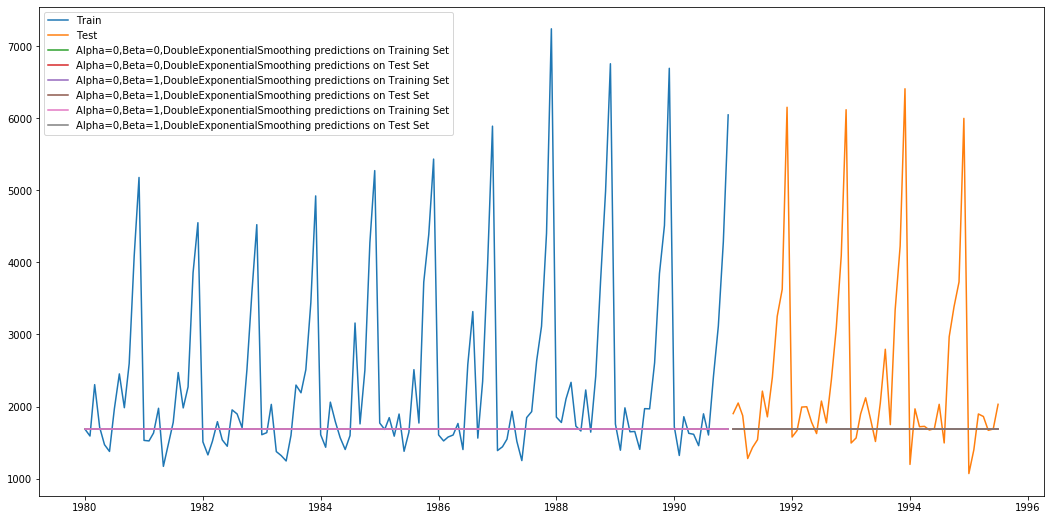

In [312]:
plt.figure(figsize=(18,9))
plt.plot(DES_train['Sales'], label='Train')
plt.plot(DES_test['Sales'], label='Test')

plt.plot(DES_train['predict', 0, 0], label='Alpha=0,Beta=0,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0, 0], label='Alpha=0,Beta=0,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(DES_train['predict', 0, 1.0], label='Alpha=0,Beta=1,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0, 1.0], label='Alpha=0,Beta=1,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(DES_train['predict', 0, 0.5], label='Alpha=0,Beta=1,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0, 0.5], label='Alpha=0,Beta=1,DoubleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')

Text(0.5, 1.0, 'Comparision of DES Models')

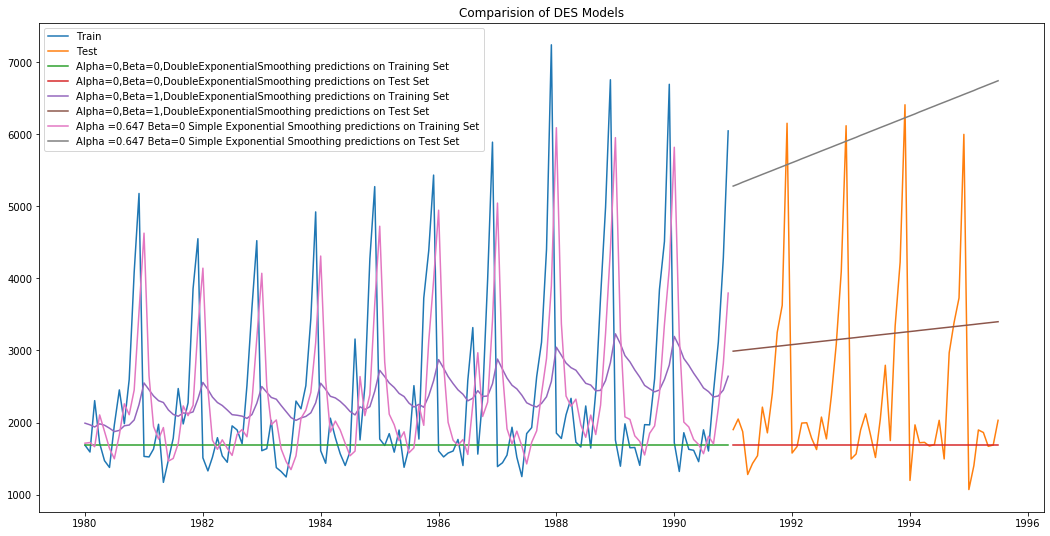

In [313]:
plt.figure(figsize=(18,9))
plt.plot(DES_train['Sales'], label='Train')
plt.plot(DES_test['Sales'], label='Test')

plt.plot(DES_train['predict', 0, 0], label='Alpha=0,Beta=0,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0, 0], label='Alpha=0,Beta=0,DoubleExponentialSmoothing predictions on Test Set')



plt.plot(DES_train['predict', 0.1, 0], label='Alpha=0,Beta=1,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.1, 0], label='Alpha=0,Beta=1,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(DES_train['Predict'], label='Alpha =0.647 Beta=0 Simple Exponential Smoothing predictions on Training Set')
plt.plot(DES_test['Predict'], label='Alpha =0.647 Beta=0 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.title('Comparision of DES Models')

Text(0.5, 1.0, 'Comparision of DES Models')

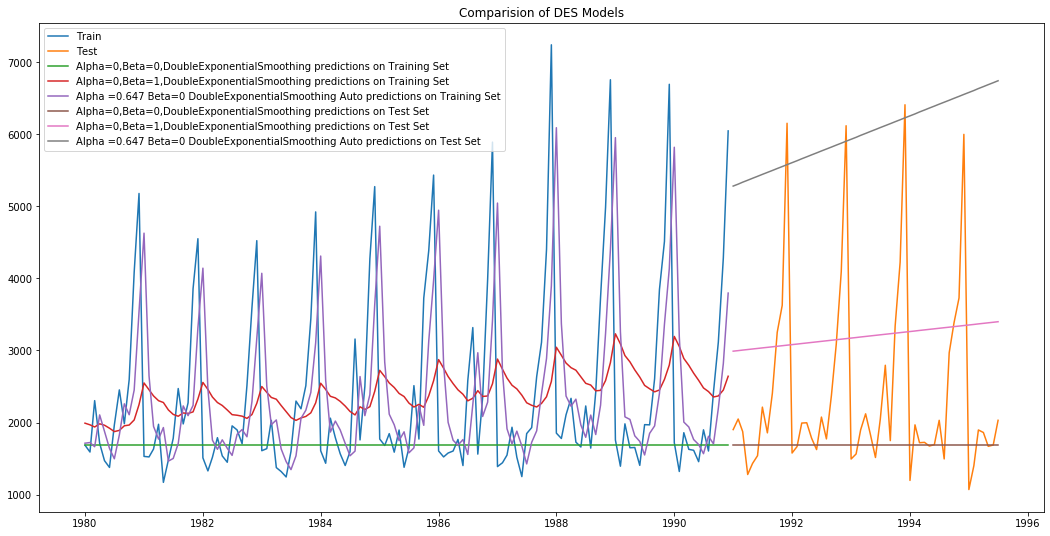

In [549]:
plt.figure(figsize=(18,9))
plt.plot(DES_train['Sales'], label='Train')
plt.plot(DES_test['Sales'], label='Test')

plt.plot(DES_train['predict', 0, 0], label='Alpha=0,Beta=0,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_train['predict', 0.1, 0], label='Alpha=0,Beta=1,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_train['Predict'], label='Alpha =0.647 Beta=0 DoubleExponentialSmoothing Auto predictions on Training Set')


plt.plot(DES_test['predict', 0, 0], label='Alpha=0,Beta=0,DoubleExponentialSmoothing predictions on Test Set')
plt.plot(DES_test['predict', 0.1, 0], label='Alpha=0,Beta=1,DoubleExponentialSmoothing predictions on Test Set')
plt.plot(DES_test['Predict'], label='Alpha =0.647 Beta=0 DoubleExponentialSmoothing Auto predictions on Test Set')

plt.legend(loc='best')
plt.title('Comparision of DES Models')

In [314]:
resultsDf_DES_1 = pd.DataFrame({'Test RMSE': [resultsDf_DES['Test RMSE'][0]],'Test MAPE':[resultsDf_DES['Test MAPE'][0]]}
                           ,index=['Alpha=0,Beta=0,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_DES_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                           1279.322346      40.05
RegressionOnTimeSeasonal                    420.866517      13.29
Naive                                      3864.279352     152.87
SimpleAvg                                  1275.081804      38.90
Trailing_MA_2                               813.400684      19.70
Trailing_MA_3                              1156.589694      35.96
Trailing_MA_6                              1283.927428      43.86
Trailing_MA_9                              1346.278315      46.86
SEC_alpha=0                                1275.081823      38.90
Alpha=0.1,SimpleExponentialSmoothing       1275.081846      38.90
Alpha=0.2,SimpleExponentialSmoothing       1275.081846      38.90
DES Alpha=0.647,Beta=0                     3851.171500     152.07
Alpha=0,Beta=0,DoubleExponentialSmoothing  1460.954675      34.41

### Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [322]:
import statsmodels.api as sm

In [323]:
TES_train = pd.DataFrame(train.copy())
TES_test = pd.DataFrame(test.copy())

In [ ]:
model_TES = ExponentialSmoothing(TES_train['Sales'],seasonal_periods = 12 ,trend='additive',seasonal='additive')
model_TES_autofit = model_TES.fit()

In [325]:
model_TES_autofit.params

{'smoothing_level': 0.08622052864340005,
 'smoothing_slope': 1.7097923242790787e-09,
 'smoothing_seasonal': 0.476348411283582,
 'damping_slope': nan,
 'initial_level': 1685.0330927463103,
 'initial_slope': 3.268126463343508e-09,
 'initial_seasons': array([  38.53100271,  -37.57689912,  464.75420339,  205.89223136,
        -140.66189258, -156.89672956,  338.19195606,  856.38589201,
         402.98286327,  971.15758553, 2401.41729185, 3426.30639716]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [326]:
TES_train['Predict'] = model_TES_autofit.fittedvalues
TES_train.head()

Sales      Predict
YearMonth                     
1980-01-01   1686  1723.564095
1980-02-01   1591  1644.217397
1980-03-01   2304  2141.960068
1980-04-01   1712  1897.069264
1980-05-01   1471  1534.558371

In [331]:
## Prediction on the test data

TES_test['Predict'] = model_TES_autofit.forecast(steps=55)
TES_test.head()

Sales  auto_predict      Predict
YearMonth                                   
1991-01-01   1902   1532.368807  1532.368807
1991-02-01   2049   1241.329822  1241.329822
1991-03-01   1874   1726.719960  1726.719960
1991-04-01   1279   1584.260962  1584.260962
1991-05-01   1432   1493.955208  1493.955208

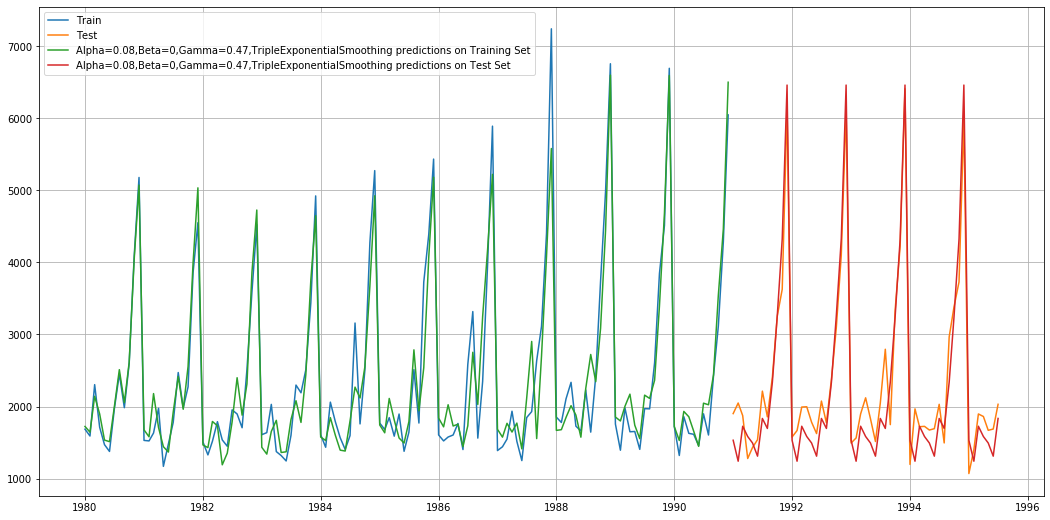

In [332]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sales'], label='Train')
plt.plot(TES_test['Sales'], label='Test')

plt.plot(TES_train['Predict'], label='Alpha=0.08,Beta=0,Gamma=0.47,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['Predict'], label='Alpha=0.08,Beta=0,Gamma=0.47,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [334]:
rmse,mape=calculate_metrics(TES_test['Sales'],TES_test['Predict'])
tempResultsDf = pd.DataFrame({'Test RMSE': [rmse], 'Test MAPE' : [mape]},index=['Triple Exponential Smoothing Alpha=0.08,Beta=0,Gamma=0.47'])
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    1279.322346      40.05
RegressionOnTimeSeasonal                             420.866517      13.29
Naive                                               3864.279352     152.87
SimpleAvg                                           1275.081804      38.90
Trailing_MA_2                                        813.400684      19.70
Trailing_MA_3                                       1156.589694      35.96
Trailing_MA_6                                       1283.927428      43.86
Trailing_MA_9                                       1346.278315      46.86
SEC_alpha=0                                         1275.081823      38.90
Alpha=0.1,SimpleExponentialSmoothing                1275.081846      38.90
Alpha=0.2,SimpleExponentialSmoothing                1275.081846      38.90
DES Alpha=0.647,Beta=0                              3851.171500     152.07
Alpha=0,Beta=0,DoubleExponentialSmoothing           1460.954675      34.41
DES Alpha=0.647,Beta=0                               362.791906      12.08
Triple Exponential Smoothing Alpha=0.08,Beta=0,...   362.791906      12.08

In [335]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_TES = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_TES

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [337]:
for i in np.arange(0,1.1,0.1):
    for j in np.arange(0.0,0.1,0.1):
        for k in np.arange(0,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_TES_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict',i,j,k],squared=False)
            mape_TES_train = MAPE(TES_train['Sales'],TES_train['predict',i,j,k])
        
            rmse_TES_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict',i,j,k],squared=False)
            mape_TES_test = MAPE(TES_test['Sales'],TES_test['predict',i,j,k])
        
            resultsDf_TES = resultsDf_TES.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_TES_train
                                      ,'Train MAPE': mape_TES_train,'Test RMSE':rmse_TES_test
                                      ,'Test MAPE':mape_TES_test}, ignore_index=True)

In [338]:
resultsDf_TES

Alpha Values  Beta Values  Gamma Values   Train RMSE  Train MAPE  \
0             0.0          0.0           0.0   466.506268       12.95   
1             0.0          0.0           0.1   433.626602       11.88   
2             0.0          0.0           0.2   410.391464       11.13   
3             0.0          0.0           0.3   395.321368       11.03   
4             0.0          0.0           0.4   386.896013       11.00   
..            ...          ...           ...          ...         ...   
116           1.0          0.0           0.6   550.098342       16.75   
117           1.0          0.0           0.7   597.069797       18.32   
118           1.0          0.0           0.8   671.008918       20.40   
119           1.0          0.0           0.9   793.695997       23.94   
120           1.0          0.0           1.0  1021.476234       30.55   

      Test RMSE  Test MAPE  
0    479.738035      16.11  
1    354.048802      12.05  
2    306.663375       9.82  
3    309.601501       9.60  
4    328.440865       9.97  
..          ...        ...  
116  551.774845      16.71  
117  582.623954      18.59  
118  657.372584      20.76  
119  796.736952      24.20  
120  995.427272      29.55  

[121 rows x 7 columns]

In [342]:
resultsDf_TES.sort_values('Test MAPE')

Alpha Values  Beta Values  Gamma Values  Train RMSE  Train MAPE  \
3             0.0          0.0           0.3  395.321368       11.03   
46            0.4          0.0           0.2  422.395979       12.28   
13            0.1          0.0           0.2  394.949004       11.35   
57            0.5          0.0           0.2  431.246401       12.52   
2             0.0          0.0           0.2  410.391464       11.13   
..            ...          ...           ...         ...         ...   
110           1.0          0.0           0.0  566.021964       16.44   
65            0.5          0.0           1.0  531.415164       15.19   
75            0.6          0.0           0.9  521.824431       15.04   
87            0.7          0.0           1.0  625.972812       18.32   
76            0.6          0.0           1.0  577.612671       16.65   

       Test RMSE  Test MAPE  
3     309.601501       9.60  
46    315.945653       9.63  
13    305.809982       9.72  
57    322.669134       9.79  
2     306.663375       9.82  
..           ...        ...  
110   887.233699      32.46  
65    875.541786      32.90  
75    887.490488      33.24  
87    955.529273      36.61  
76   1015.541743      38.36  

[121 rows x 7 columns]

In [343]:
resultsDf_TES.sort_values('Test RMSE')

Alpha Values  Beta Values  Gamma Values   Train RMSE  Train MAPE  \
13            0.1          0.0           0.2   394.949004       11.35   
2             0.0          0.0           0.2   410.391464       11.13   
3             0.0          0.0           0.3   395.321368       11.03   
46            0.4          0.0           0.2   422.395979       12.28   
24            0.2          0.0           0.2   403.033460       11.76   
..            ...          ...           ...          ...         ...   
110           1.0          0.0           0.0   566.021964       16.44   
75            0.6          0.0           0.9   521.824431       15.04   
87            0.7          0.0           1.0   625.972812       18.32   
120           1.0          0.0           1.0  1021.476234       30.55   
76            0.6          0.0           1.0   577.612671       16.65   

       Test RMSE  Test MAPE  
13    305.809982       9.72  
2     306.663375       9.82  
3     309.601501       9.60  
46    315.945653       9.63  
24    316.811106      10.49  
..           ...        ...  
110   887.233699      32.46  
75    887.490488      33.24  
87    955.529273      36.61  
120   995.427272      29.55  
76   1015.541743      38.36  

[121 rows x 7 columns]

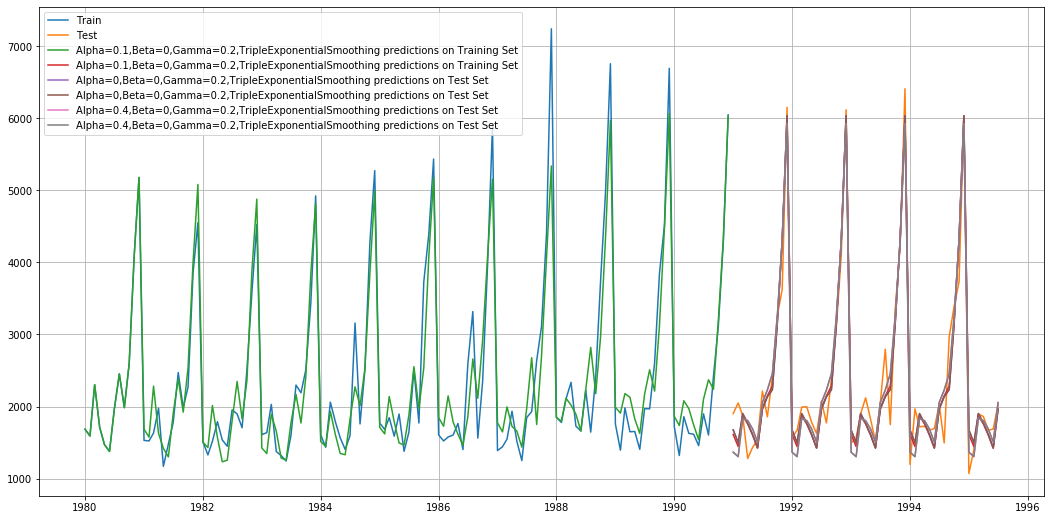

In [344]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sales'], label='Train')
plt.plot(TES_test['Sales'], label='Test')

plt.plot(TES_train['predict', 0.1, 0.0, 0.2], label='Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict', 0.1, 0.0, 0.2], label='Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmoothing predictions on Training Set')

plt.plot(TES_test['predict', 0.0, 0.0, 0.2], label='Alpha=0,Beta=0,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')
plt.plot(TES_test['predict', 0.0, 0.0, 0.2], label='Alpha=0,Beta=0,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.4, 0.0, 0.2], label='Alpha=0.4,Beta=0,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')
plt.plot(TES_test['predict', 0.4, 0.0, 0.2], label='Alpha=0.4,Beta=0,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

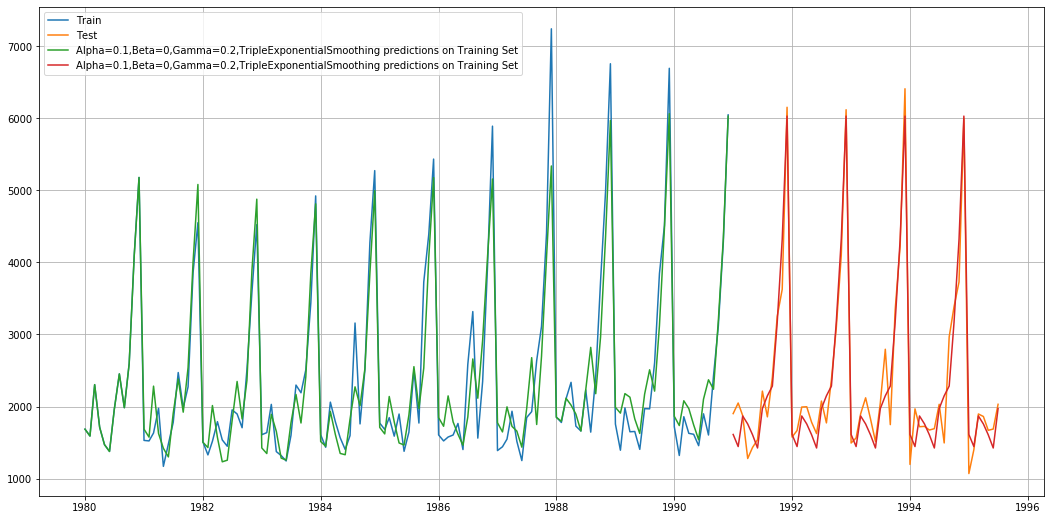

In [550]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sales'], label='Train')
plt.plot(TES_test['Sales'], label='Test')

plt.plot(TES_train['predict', 0.1, 0.0, 0.2], label='Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict', 0.1, 0.0, 0.2], label='Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmoothing predictions on Training Set')


plt.legend(loc='best')
plt.grid();

In [350]:
resultsDf_TES=resultsDf_TES.sort_values('Test RMSE')
resultsDf_TES

Alpha Values  Beta Values  Gamma Values   Train RMSE  Train MAPE  \
13            0.1          0.0           0.2   394.949004       11.35   
2             0.0          0.0           0.2   410.391464       11.13   
3             0.0          0.0           0.3   395.321368       11.03   
46            0.4          0.0           0.2   422.395979       12.28   
24            0.2          0.0           0.2   403.033460       11.76   
..            ...          ...           ...          ...         ...   
110           1.0          0.0           0.0   566.021964       16.44   
75            0.6          0.0           0.9   521.824431       15.04   
87            0.7          0.0           1.0   625.972812       18.32   
120           1.0          0.0           1.0  1021.476234       30.55   
76            0.6          0.0           1.0   577.612671       16.65   

       Test RMSE  Test MAPE  
13    305.809982       9.72  
2     306.663375       9.82  
3     309.601501       9.60  
46    315.945653       9.63  
24    316.811106      10.49  
..           ...        ...  
110   887.233699      32.46  
75    887.490488      33.24  
87    955.529273      36.61  
120   995.427272      29.55  
76   1015.541743      38.36  

[121 rows x 7 columns]

In [354]:
resultsDf_TES_1 = pd.DataFrame({'Test RMSE': [resultsDf_TES['Test RMSE'][13],resultsDf_TES['Test RMSE'][2],resultsDf_TES['Test RMSE'][3]],
                                'Test MAPE':[resultsDf_TES['Test MAPE'][13],resultsDf_TES['Test MAPE'][2],resultsDf_TES['Test MAPE'][3]]}
                           ,index=['Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmoothing','Alpha=0,Beta=0,Gamma=0.2,TripleExponentialSmoothing','Alpha=0,Beta=0,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_TES_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    1279.322346      40.05
RegressionOnTimeSeasonal                             420.866517      13.29
Naive                                               3864.279352     152.87
SimpleAvg                                           1275.081804      38.90
Trailing_MA_2                                        813.400684      19.70
Trailing_MA_3                                       1156.589694      35.96
Trailing_MA_6                                       1283.927428      43.86
Trailing_MA_9                                       1346.278315      46.86
SEC_alpha=0                                         1275.081823      38.90
Alpha=0.1,SimpleExponentialSmoothing                1275.081846      38.90
Alpha=0.2,SimpleExponentialSmoothing                1275.081846      38.90
DES Alpha=0.647,Beta=0                              3851.171500     152.07
Alpha=0,Beta=0,DoubleExponentialSmoothing           1460.954675      34.41
DES Alpha=0.647,Beta=0                               362.791906      12.08
Triple Exponential Smoothing Alpha=0.08,Beta=0,...   362.791906      12.08
Alpha=0.1,Beta=0,Gamma=0.3,TripleExponentialSmo...   479.738035      16.11
Alpha=0.1,Beta=0,Gamma=0.3,TripleExponentialSmo...   305.809982       9.72
Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmo...   305.809982       9.72
Alpha=0,Beta=0,Gamma=0.3,TripleExponentialSmoot...   309.601501       9.60
Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmo...   305.809982       9.72
Alpha=0,Beta=0,Gamma=0.2,TripleExponentialSmoot...   306.663375       9.82
Alpha=0,Beta=0,Gamma=0.3,TripleExponentialSmoot...   309.601501       9.60

In [355]:
resultsDf.sort_values('Test RMSE')

Test RMSE  Test MAPE
Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmo...   305.809982       9.72
Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmo...   305.809982       9.72
Alpha=0.1,Beta=0,Gamma=0.3,TripleExponentialSmo...   305.809982       9.72
Alpha=0,Beta=0,Gamma=0.2,TripleExponentialSmoot...   306.663375       9.82
Alpha=0,Beta=0,Gamma=0.3,TripleExponentialSmoot...   309.601501       9.60
Alpha=0,Beta=0,Gamma=0.3,TripleExponentialSmoot...   309.601501       9.60
Triple Exponential Smoothing Alpha=0.08,Beta=0,...   362.791906      12.08
DES Alpha=0.647,Beta=0                               362.791906      12.08
RegressionOnTimeSeasonal                             420.866517      13.29
Alpha=0.1,Beta=0,Gamma=0.3,TripleExponentialSmo...   479.738035      16.11
Trailing_MA_2                                        813.400684      19.70
Trailing_MA_3                                       1156.589694      35.96
SimpleAvg                                           1275.081804      38.90
SEC_alpha=0                                         1275.081823      38.90
Alpha=0.2,SimpleExponentialSmoothing                1275.081846      38.90
Alpha=0.1,SimpleExponentialSmoothing                1275.081846      38.90
RegressionOnTime                                    1279.322346      40.05
Trailing_MA_6                                       1283.927428      43.86
Trailing_MA_9                                       1346.278315      46.86
Alpha=0,Beta=0,DoubleExponentialSmoothing           1460.954675      34.41
DES Alpha=0.647,Beta=0                              3851.171500     152.07
Naive                                               3864.279352     152.87

## 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

Augmented Dickey Fuller Test
Null hypothesis : TS is **non-stationary**.
Alternate hypothesis : Time Series is Stationary    

In [356]:
from statsmodels.tsa.stattools import adfuller

In [360]:
dftest = adfuller(sparkling['Sales'])
dftest
print('DF test statistic is %3.3f' %dftest[0])

print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.360
DF test p-value is 0.6011


p>0.05
p is high, Null will Fly
Time Series is non - Stationary

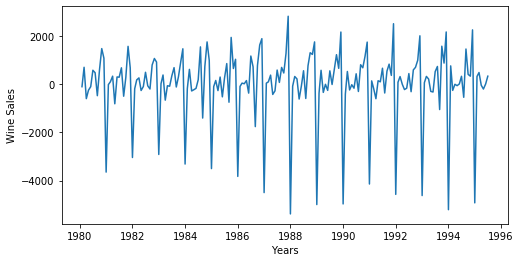

In [361]:
plt.figure(figsize=(8, 4))
plt.plot(sparkling['Sales'].diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Wine Sales');

In [364]:
dftest = adfuller(sparkling['Sales'].diff(periods=1).dropna())
dftest
print('DF test statistic is %3.3f' %dftest[0])

print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -45.050
DF test p-value is 0.0000


Now Time series is Stationary

In [370]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

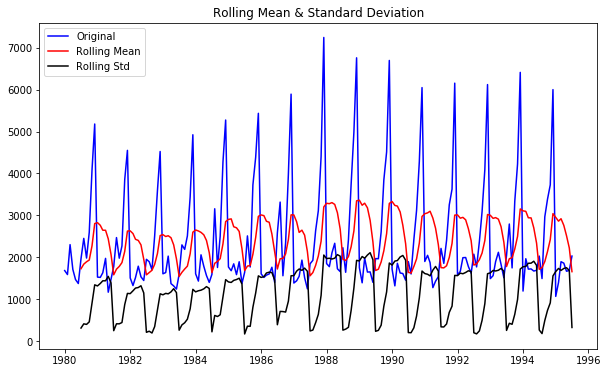

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [371]:
test_stationarity(sparkling['Sales'])

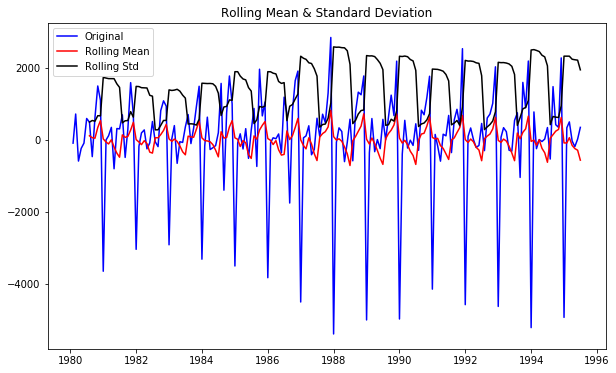

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [373]:
test_stationarity(sparkling['Sales'].diff().dropna())

## 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [412]:
ARIMA_train=sparkling[sparkling.index.year<1991]
ARIMA_test=sparkling[sparkling.index.year>1990]

In [375]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [376]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sales
YearMonth        
1980-01-01   1686
1980-02-01   1591
1980-03-01   2304
1980-04-01   1712
1980-05-01   1471

Last few rows of Training Data


Sales
YearMonth        
1990-08-01   1605
1990-09-01   2424
1990-10-01   3116
1990-11-01   4286
1990-12-01   6047

First few rows of Test Data


Sales
YearMonth        
1991-01-01   1902
1991-02-01   2049
1991-03-01   1874
1991-04-01   1279
1991-05-01   1432

Last few rows of Test Data


Sales
YearMonth        
1995-03-01   1897
1995-04-01   1862
1995-05-01   1670
1995-06-01   1688
1995-07-01   2031

In [377]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [378]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [395]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [396]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sales'],order=param,freq='MS').fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.906437115225
ARIMA(0, 1, 2) - AIC:2232.783097684332
ARIMA(1, 1, 0) - AIC:2268.5280605942976
ARIMA(1, 1, 1) - AIC:2235.013945351675
ARIMA(1, 1, 2) - AIC:2233.5976471190743
ARIMA(2, 1, 0) - AIC:2262.0356001096925
ARIMA(2, 1, 1) - AIC:2232.3604898897147
ARIMA(2, 1, 2) - AIC:2210.6176473763135


C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [397]:
ARIMA_AIC

param          AIC
0  (0, 1, 0)  2269.582796
1  (0, 1, 1)  2264.906437
2  (0, 1, 2)  2232.783098
3  (1, 1, 0)  2268.528061
4  (1, 1, 1)  2235.013945
5  (1, 1, 2)  2233.597647
6  (2, 1, 0)  2262.035600
7  (2, 1, 1)  2232.360490
8  (2, 1, 2)  2210.617647

In [398]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2210.617647
7  (2, 1, 1)  2232.360490
2  (0, 1, 2)  2232.783098
5  (1, 1, 2)  2233.597647
4  (1, 1, 1)  2235.013945
6  (2, 1, 0)  2262.035600
1  (0, 1, 1)  2264.906437
3  (1, 1, 0)  2268.528061
0  (0, 1, 0)  2269.582796

In [385]:
auto_ARIMA = ARIMA(train['Sales'], order=(2,1,1),freq='MS')
results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                  131
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1111.180
Method:                       css-mle   S.D. of innovations           1148.860
Date:                Fri, 11 Sep 2020   AIC                           2232.360
Time:                        23:50:59   BIC                           2246.736
Sample:                    02-01-1980   HQIC                          2238.202
                         - 12-01-1990                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.2032      3.807      1.629      0.106      -1.259      13.665
ar.L1.D.Sales     0.5026      0.087      5.753      0.000       0.331       0.674
ar.L2.D.Sales    -0.1910      0.088     

In [419]:
results_auto_ARIMA.forecast(steps=len(ARIMA_test))[0]

array([4145.91563863, 2858.41925719, 2578.74824624, 2688.3781981 ,
       2801.16190543, 2841.17406043, 2844.01151677, 2842.06569615,
       2844.81634519, 2850.84087506, 2857.6137121 , 2864.13730956,
       2870.39272155, 2876.56095808, 2882.73660684, 2888.93263124,
       2895.13747996, 2901.34287171, 2907.54685092, 2913.75001653,
       2919.95304304, 2926.15615504, 2932.35933658, 2938.56253673,
       2944.76573296, 2950.96892365, 2957.17211232, 2963.37530103,
       2969.57849014, 2975.78167945, 2981.98486878, 2988.18805809,
       2994.39124737, 3000.59443666, 3006.79762594, 3013.00081523,
       3019.20400451, 3025.4071938 , 3031.61038309, 3037.81357237,
       3044.01676166, 3050.21995094, 3056.42314023, 3062.62632952,
       3068.8295188 , 3075.03270809, 3081.23589737, 3087.43908666,
       3093.64227595, 3099.84546523, 3106.04865452, 3112.2518438 ,
       3118.45503309, 3124.65822238, 3130.86141166])

In [420]:
ARIMA_train['Predicted']=results_auto_ARIMA.fittedvalues
ARIMA_test_result=results_auto_ARIMA.forecast(steps=len(ARIMA_test))
#ARIMA_test['Predicted'] = ARIMA_test_result[0]

C:\Users\chith\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\chith\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [408]:
rmse,mape=calculate_metrics(test.Sales,predicted_auto_ARIMA[0])
tempDf = pd.DataFrame({'Test RMSE': [rmse],
                                'Test MAPE':[mape]}
                           ,index=['Auto ARIMA (2,1,1)'])

resultsDf = pd.concat([resultsDf, tempDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    1279.322346      40.05
RegressionOnTimeSeasonal                             420.866517      13.29
Naive                                               3864.279352     152.87
SimpleAvg                                           1275.081804      38.90
Trailing_MA_2                                        813.400684      19.70
Trailing_MA_3                                       1156.589694      35.96
Trailing_MA_6                                       1283.927428      43.86
Trailing_MA_9                                       1346.278315      46.86
SEC_alpha=0                                         1275.081823      38.90
Alpha=0.1,SimpleExponentialSmoothing                1275.081846      38.90
Alpha=0.2,SimpleExponentialSmoothing                1275.081846      38.90
DES Alpha=0.647,Beta=0                              3851.171500     152.07
Alpha=0,Beta=0,DoubleExponentialSmoothing           1460.954675      34.41
DES Alpha=0.647,Beta=0                               362.791906      12.08
Triple Exponential Smoothing Alpha=0.08,Beta=0,...   362.791906      12.08
Alpha=0.1,Beta=0,Gamma=0.3,TripleExponentialSmo...   479.738035      16.11
Alpha=0.1,Beta=0,Gamma=0.3,TripleExponentialSmo...   305.809982       9.72
Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmo...   305.809982       9.72
Alpha=0,Beta=0,Gamma=0.3,TripleExponentialSmoot...   309.601501       9.60
Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmo...   305.809982       9.72
Alpha=0,Beta=0,Gamma=0.2,TripleExponentialSmoot...   306.663375       9.82
Alpha=0,Beta=0,Gamma=0.3,TripleExponentialSmoot...   309.601501       9.60
ARIMA 2,1,1                                         1418.206709      51.28
ARIMA 2,1,1                                         1418.206709      51.28

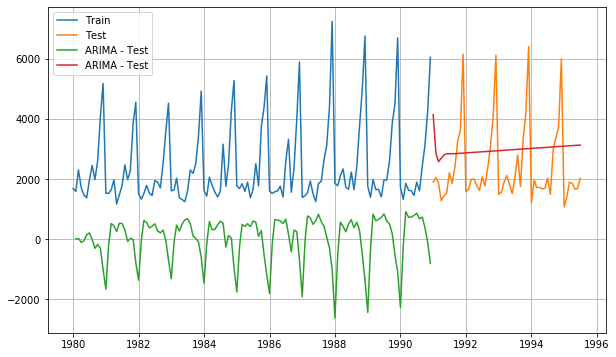

In [422]:
plt.plot(train,label='Train')
plt.plot(test,label='Test')

plt.plot(ARIMA_train.index,ARIMA_train['Predicted'],label='ARIMA - Test')
plt.plot(ARIMA_test.index,ARIMA_test_result[0],label='ARIMA - Test')
plt.legend(loc='best')
plt.grid();

### SARIMA

In [464]:
SARIMA_train=sparkling[sparkling.index.year<1991]
SARIMA_test=sparkling[sparkling.index.year>1990]

In [434]:
### As the dataset has seasonality.. Let's build the model with SARIMA
SARIMA_result_df = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_result_df

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [559]:
### As the dataset has seasonality.. Let's build the model with SARIMA
SARIMA_result_df_1 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_result_df_1

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [553]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D=range(0,2)
pdq = list(itertools.product(p, d, q))

PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)


In [560]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in PDQ:
        mod = sm.tsa.statespace.SARIMAX(SARIMA_train['Sales'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False,freq='MS')
            
        SARIMA_model_result = mod.fit()
        print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, SARIMA_model_result.aic))
        SARIMA_result_df_1 = SARIMA_result_df.append({'param':param,'seasonal':param_seasonal ,'AIC': SARIMA_model_result.aic}, ignore_index=True)
        

SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1956.2614616845638
SARIMA(0, 1, 0)x(0, 0, 2, 12)12 - AIC:1723.1533640238588
SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1822.982485206384
SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1626.8626334678995
SARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:1452.6773574258038
SARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1837.4366022456677
SARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1806.9905301389376
SARIMA(0, 1, 0)x(1, 0, 2, 12)12 - AIC:1633.2108735791742
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:1646.3778167661442
SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1628.3243908188433
SARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:1454.5289621307177
SARIMA(0, 1, 0)x(2, 0, 0, 12)12 - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12)12 - AIC:1647.205415861309
SARIMA(0, 1, 0)x(2, 0, 2, 12)12 - AIC:1630.9898053920822
SARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:1466.6211360755017
SARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:1468.5000981866654
SARIMA(0, 1, 0)x(2, 1, 2, 12)12 -

C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 1)x(2, 0, 2, 12)12 - AIC:1570.404578417551
SARIMA(0, 1, 1)x(2, 1, 0, 12)12 - AIC:1428.2448811173367
SARIMA(0, 1, 1)x(2, 1, 1, 12)12 - AIC:1429.6168027963427
SARIMA(0, 1, 1)x(2, 1, 2, 12)12 - AIC:1402.6385888505506
SARIMA(0, 1, 2)x(0, 0, 0, 12)12 - AIC:2187.441010168715
SARIMA(0, 1, 2)x(0, 0, 1, 12)12 - AIC:1887.9128007201286
SARIMA(0, 1, 2)x(0, 0, 2, 12)12 - AIC:1659.878989100836
SARIMA(0, 1, 2)x(0, 1, 0, 12)12 - AIC:1741.3207220431934
SARIMA(0, 1, 2)x(0, 1, 1, 12)12 - AIC:1554.7429039624678
SARIMA(0, 1, 2)x(0, 1, 2, 12)12 - AIC:1382.4842540782267
SARIMA(0, 1, 2)x(1, 0, 0, 12)12 - AIC:1790.0326332308127
SARIMA(0, 1, 2)x(1, 0, 1, 12)12 - AIC:1724.167507078052
SARIMA(0, 1, 2)x(1, 0, 2, 12)12 - AIC:1557.1605068607357
SARIMA(0, 1, 2)x(1, 1, 0, 12)12 - AIC:1601.758729300057
SARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:1556.1559717581945
SARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:1384.3988672020148
SARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:1603.9654774379253
SARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AI

C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:1557.964056743082
SARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:1427.0773415951423
SARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:1428.5534767508623
SARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:1386.0237342630778
SARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:2250.3181267386713
SARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1954.393833990475
SARIMA(1, 1, 0)x(0, 0, 2, 12)12 - AIC:1721.2688476355372
SARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:1810.9513015567377
SARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1613.740703340952
SARIMA(1, 1, 0)x(0, 1, 2, 12)12 - AIC:1441.425999423405
SARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:1811.2440279330344
SARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1788.5343592678848
SARIMA(1, 1, 0)x(1, 0, 2, 12)12 - AIC:1616.4894404973431
SARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:1619.6703363508893
SARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1615.7404485201637
SARIMA(1, 1, 0)x(1, 1, 2, 12)12 - AIC:1443.1035528175819
SARIMA(1, 1, 0)x(2, 0, 0, 12)12 - AIC:1621.6355080129129
SARIMA(1, 1, 0)x(2, 0, 1, 12)12 - A

C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1739.5449373547183
SARIMA(1, 1, 1)x(1, 0, 2, 12)12 - AIC:1571.3248863528565
SARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:1588.0655672689484
SARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1570.6724644578535
SARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:1400.4523886147058
SARIMA(1, 1, 1)x(2, 0, 0, 12)12 - AIC:1590.6161606873197


C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 1)x(2, 0, 1, 12)12 - AIC:1594.4260148315268


C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 1)x(2, 0, 2, 12)12 - AIC:1575.9676341641475
SARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC:1413.5679859609954
SARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:1414.8736681603814
SARIMA(1, 1, 1)x(2, 1, 2, 12)12 - AIC:1402.2732672818033
SARIMA(1, 1, 2)x(0, 0, 0, 12)12 - AIC:2188.4633450503966
SARIMA(1, 1, 2)x(0, 0, 1, 12)12 - AIC:1889.7708307496468
SARIMA(1, 1, 2)x(0, 0, 2, 12)12 - AIC:1659.6291421759486
SARIMA(1, 1, 2)x(0, 1, 0, 12)12 - AIC:1742.736627694264
SARIMA(1, 1, 2)x(0, 1, 1, 12)12 - AIC:1554.958413902098
SARIMA(1, 1, 2)x(0, 1, 2, 12)12 - AIC:1382.3477800331605


C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(1, 0, 0, 12)12 - AIC:1771.829947353285


C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(1, 0, 1, 12)12 - AIC:1723.9872373809744


C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(1, 0, 2, 12)12 - AIC:1555.5842781519718
SARIMA(1, 1, 2)x(1, 1, 0, 12)12 - AIC:1585.7860900921307
SARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:1556.130044171483
SARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:1384.1378738627402
SARIMA(1, 1, 2)x(2, 0, 0, 12)12 - AIC:1588.4216933305888


C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(2, 0, 1, 12)12 - AIC:1587.5367882174933


C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(2, 0, 2, 12)12 - AIC:1563.347814080682
SARIMA(1, 1, 2)x(2, 1, 0, 12)12 - AIC:1411.9924109676372
SARIMA(1, 1, 2)x(2, 1, 1, 12)12 - AIC:1413.591829373822
SARIMA(1, 1, 2)x(2, 1, 2, 12)12 - AIC:1385.6887207875793
SARIMA(2, 1, 0)x(0, 0, 0, 12)12 - AIC:2227.302761872421
SARIMA(2, 1, 0)x(0, 0, 1, 12)12 - AIC:1946.4383435411748
SARIMA(2, 1, 0)x(0, 0, 2, 12)12 - AIC:1711.412303983535
SARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:1779.6359486658964
SARIMA(2, 1, 0)x(0, 1, 1, 12)12 - AIC:1599.8657465663202
SARIMA(2, 1, 0)x(0, 1, 2, 12)12 - AIC:1429.602321491266
SARIMA(2, 1, 0)x(1, 0, 0, 12)12 - AIC:1780.7646066053217
SARIMA(2, 1, 0)x(1, 0, 1, 12)12 - AIC:1756.9357347830432
SARIMA(2, 1, 0)x(1, 0, 2, 12)12 - AIC:1600.970220448109
SARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:1590.6714007730448
SARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC:1587.514424657507
SARIMA(2, 1, 0)x(1, 1, 2, 12)12 - AIC:1431.1873135881758
SARIMA(2, 1, 0)x(2, 0, 0, 12)12 - AIC:1592.2403464858617
SARIMA(2, 1, 0)x(2, 0, 1, 12)12 - AIC:

C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 0)x(2, 0, 2, 12)12 - AIC:1585.9419286563775
SARIMA(2, 1, 0)x(2, 1, 0, 12)12 - AIC:1413.6736725425806
SARIMA(2, 1, 0)x(2, 1, 1, 12)12 - AIC:1415.6324293918215
SARIMA(2, 1, 0)x(2, 1, 2, 12)12 - AIC:1417.3668472984818
SARIMA(2, 1, 1)x(0, 0, 0, 12)12 - AIC:2199.858613145632
SARIMA(2, 1, 1)x(0, 0, 1, 12)12 - AIC:1905.0209495439822
SARIMA(2, 1, 1)x(0, 0, 2, 12)12 - AIC:1675.4234080334497
SARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:1758.5616376866512
SARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:1570.1755922611403
SARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:1400.2098581807484
SARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:1792.8234289905215
SARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:1740.0911247057754


C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:1583.6516921853747
SARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:1574.3724067255253
SARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:1571.8577388008732
SARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:1401.9104199707247
SARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:1577.123506089681
SARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:1573.1595848658199


C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 1)x(2, 0, 2, 12)12 - AIC:1572.6661649168038
SARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:1400.9854069823386
SARIMA(2, 1, 1)x(2, 1, 1, 12)12 - AIC:1401.992473545547
SARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC:1403.8183455879107
SARIMA(2, 1, 2)x(0, 0, 0, 12)12 - AIC:2176.868114915305
SARIMA(2, 1, 2)x(0, 0, 1, 12)12 - AIC:1892.2372640176598


C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(0, 0, 2, 12)12 - AIC:1661.552343342914
SARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:1742.2930718563246
SARIMA(2, 1, 2)x(0, 1, 1, 12)12 - AIC:1556.946732412683
SARIMA(2, 1, 2)x(0, 1, 2, 12)12 - AIC:1384.3176180645314


C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(1, 0, 0, 12)12 - AIC:1759.8453628603875


C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(1, 0, 1, 12)12 - AIC:1726.6379805430956


C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(1, 0, 2, 12)12 - AIC:1558.0565806773386
SARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:1573.1168644411769
SARIMA(2, 1, 2)x(1, 1, 1, 12)12 - AIC:1558.1200892494853
SARIMA(2, 1, 2)x(1, 1, 2, 12)12 - AIC:1386.0972419972984


C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(2, 0, 0, 12)12 - AIC:1638.589468265131


C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(2, 0, 1, 12)12 - AIC:1584.81484570622


C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(2, 0, 2, 12)12 - AIC:1681.9130643856445
SARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:1399.7756339989307
SARIMA(2, 1, 2)x(2, 1, 1, 12)12 - AIC:1401.1832161216942
SARIMA(2, 1, 2)x(2, 1, 2, 12)12 - AIC:1387.6277846121016


In [592]:
SARIMA_result_df_1

param       seasonal          AIC
0  (2, 1, 2)  (2, 1, 2, 12)  1387.627785

In [465]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in PDQ:
        mod = sm.tsa.statespace.SARIMAX(SARIMA_train['Sales'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False,freq='MS')
            
        SARIMA_model_result = mod.fit()
        print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, SARIMA_model_result.aic))
        SARIMA_result_df = SARIMA_result_df.append({'param':param,'seasonal':param_seasonal ,'AIC': SARIMA_model_result.aic}, ignore_index=True)
        

SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1956.2614616845638
SARIMA(0, 1, 0)x(0, 0, 2, 12)12 - AIC:1723.1533640238588
SARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1837.4366022456677
SARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1806.9905301389376
SARIMA(0, 1, 0)x(1, 0, 2, 12)12 - AIC:1633.2108735791742
SARIMA(0, 1, 0)x(2, 0, 0, 12)12 - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12)12 - AIC:1647.205415861309
SARIMA(0, 1, 0)x(2, 0, 2, 12)12 - AIC:1630.9898053920822
SARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:2230.1629078505857
SARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1923.7688649566387
SARIMA(0, 1, 1)x(0, 0, 2, 12)12 - AIC:1692.708957286202
SARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:1797.1795881838439
SARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1738.0903193773431
SARIMA(0, 1, 1)x(1, 0, 2, 12)12 - AIC:1570.1509144419695
SARIMA(0, 1, 1)x(2, 0, 0, 12)12 - AIC:1605.6751954177505
SARIMA(0, 1, 1)x(2, 0, 1, 12)12 - AIC:1599.2245095300011


C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 1)x(2, 0, 2, 12)12 - AIC:1570.404578417551
SARIMA(0, 1, 2)x(0, 0, 0, 12)12 - AIC:2187.441010168715
SARIMA(0, 1, 2)x(0, 0, 1, 12)12 - AIC:1887.9128007201286
SARIMA(0, 1, 2)x(0, 0, 2, 12)12 - AIC:1659.878989100836
SARIMA(0, 1, 2)x(1, 0, 0, 12)12 - AIC:1790.0326332308127
SARIMA(0, 1, 2)x(1, 0, 1, 12)12 - AIC:1724.167507078052
SARIMA(0, 1, 2)x(1, 0, 2, 12)12 - AIC:1557.1605068607357
SARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:1603.9654774379253
SARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:1600.5438799870506


C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:1557.964056743082
SARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:2250.3181267386713
SARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1954.393833990475
SARIMA(1, 1, 0)x(0, 0, 2, 12)12 - AIC:1721.2688476355372
SARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:1811.2440279330344
SARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1788.5343592678848
SARIMA(1, 1, 0)x(1, 0, 2, 12)12 - AIC:1616.4894404973431
SARIMA(1, 1, 0)x(2, 0, 0, 12)12 - AIC:1621.6355080129129
SARIMA(1, 1, 0)x(2, 0, 1, 12)12 - AIC:1617.1356132107712
SARIMA(1, 1, 0)x(2, 0, 2, 12)12 - AIC:1616.5412067514503
SARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:2204.9340491545663
SARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1907.3558974126247
SARIMA(1, 1, 1)x(0, 0, 2, 12)12 - AIC:1678.0981352620317
SARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:1775.1424478024594


C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1739.5449373547183
SARIMA(1, 1, 1)x(1, 0, 2, 12)12 - AIC:1571.3248863528565
SARIMA(1, 1, 1)x(2, 0, 0, 12)12 - AIC:1590.6161606873197


C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 1)x(2, 0, 1, 12)12 - AIC:1594.4260148315268


C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 1)x(2, 0, 2, 12)12 - AIC:1575.9676341641475
SARIMA(1, 1, 2)x(0, 0, 0, 12)12 - AIC:2188.4633450503966
SARIMA(1, 1, 2)x(0, 0, 1, 12)12 - AIC:1889.7708307496468
SARIMA(1, 1, 2)x(0, 0, 2, 12)12 - AIC:1659.6291421759486


C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(1, 0, 0, 12)12 - AIC:1771.829947353285


C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(1, 0, 1, 12)12 - AIC:1723.9872373809744


C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(1, 0, 2, 12)12 - AIC:1555.5842781519718
SARIMA(1, 1, 2)x(2, 0, 0, 12)12 - AIC:1588.4216933305888


C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(2, 0, 1, 12)12 - AIC:1587.5367882174933


C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(2, 0, 2, 12)12 - AIC:1563.347814080682
SARIMA(2, 1, 0)x(0, 0, 0, 12)12 - AIC:2227.302761872421
SARIMA(2, 1, 0)x(0, 0, 1, 12)12 - AIC:1946.4383435411748
SARIMA(2, 1, 0)x(0, 0, 2, 12)12 - AIC:1711.412303983535
SARIMA(2, 1, 0)x(1, 0, 0, 12)12 - AIC:1780.7646066053217
SARIMA(2, 1, 0)x(1, 0, 1, 12)12 - AIC:1756.9357347830432
SARIMA(2, 1, 0)x(1, 0, 2, 12)12 - AIC:1600.970220448109
SARIMA(2, 1, 0)x(2, 0, 0, 12)12 - AIC:1592.2403464858617
SARIMA(2, 1, 0)x(2, 0, 1, 12)12 - AIC:1587.6344987484952


C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 0)x(2, 0, 2, 12)12 - AIC:1585.9419286563775
SARIMA(2, 1, 1)x(0, 0, 0, 12)12 - AIC:2199.858613145632
SARIMA(2, 1, 1)x(0, 0, 1, 12)12 - AIC:1905.0209495439822
SARIMA(2, 1, 1)x(0, 0, 2, 12)12 - AIC:1675.4234080334497
SARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:1792.8234289905215
SARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:1740.0911247057754


C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:1583.6516921853747
SARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:1577.123506089681
SARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:1573.1595848658199


C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 1)x(2, 0, 2, 12)12 - AIC:1572.6661649168038
SARIMA(2, 1, 2)x(0, 0, 0, 12)12 - AIC:2176.868114915305
SARIMA(2, 1, 2)x(0, 0, 1, 12)12 - AIC:1892.2372640176598


C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(0, 0, 2, 12)12 - AIC:1661.552343342914


C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(1, 0, 0, 12)12 - AIC:1759.8453628603875


C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(1, 0, 1, 12)12 - AIC:1726.6379805430956


C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(1, 0, 2, 12)12 - AIC:1558.0565806773386


C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(2, 0, 0, 12)12 - AIC:1638.589468265131


C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(2, 0, 1, 12)12 - AIC:1584.81484570622
SARIMA(2, 1, 2)x(2, 0, 2, 12)12 - AIC:1681.9130643856445


C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [466]:
SARIMA_result_df.sort_values("AIC")

param       seasonal          AIC
50   (1, 1, 2)  (1, 0, 2, 12)  1555.584278
131  (1, 1, 2)  (1, 0, 2, 12)  1555.584278
23   (0, 1, 2)  (1, 0, 2, 12)  1557.160507
104  (0, 1, 2)  (1, 0, 2, 12)  1557.160507
107  (0, 1, 2)  (2, 0, 2, 12)  1557.964057
..         ...            ...          ...
9    (0, 1, 1)  (0, 0, 0, 12)  2230.162908
108  (1, 1, 0)  (0, 0, 0, 12)  2250.318127
27   (1, 1, 0)  (0, 0, 0, 12)  2250.318127
81   (0, 1, 0)  (0, 0, 0, 12)  2251.359720
0    (0, 1, 0)  (0, 0, 0, 12)  2251.359720

[162 rows x 3 columns]

In [593]:
#(1,1,2)(0,1,2,12
auto_SARIMA=sm.tsa.statespace.SARIMAX(SARIMA_train['Sales'],
                                            order=(1,1,2),
                                            seasonal_order=(0,1,2,12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False,freq='MS')
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Sales   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -685.174
Date:                            Mon, 14 Sep 2020   AIC                           1382.348
Time:                                    20:05:22   BIC                           1397.479
Sample:                                01-01-1980   HQIC                          1388.455
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5507      0.287     -1.922      0.055      -1.112       0.011
ma.L1         -0.1612      0.235   

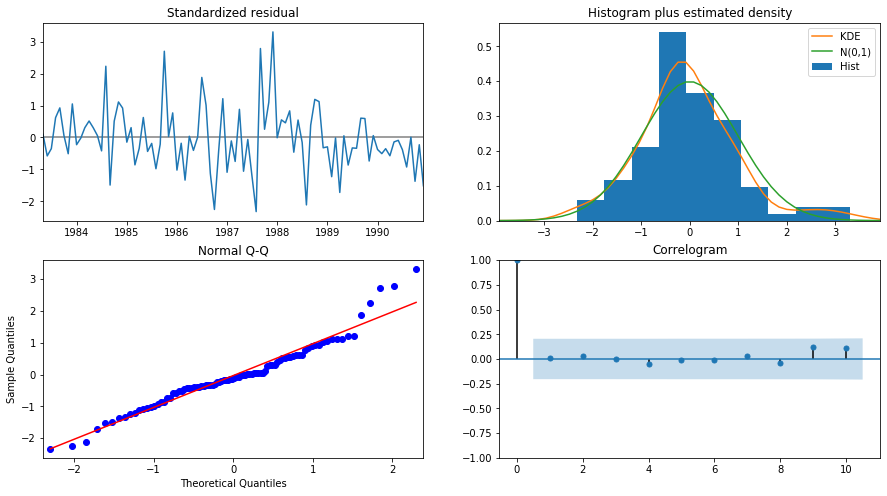

In [594]:
results_auto_SARIMA.plot_diagnostics()
plt.show()

In [595]:
predicted_auto_SARIMA = results_auto_SARIMA.forecast(steps=len(SARIMA_test))
predicted_auto_SARIMA_train = results_auto_SARIMA.fittedvalues

In [596]:
predicted_auto_SARIMA_summaryframe=results_auto_SARIMA.get_forecast(steps=len(SARIMA_test))
predicted_auto_SARIMA_summaryframe.summary_frame(alpha=0.05).head()

Sales              mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  1460.244628  412.922765     650.930880    2269.558377
1991-02-01  1392.437181  429.721296     550.198917    2234.675445
1991-03-01  1743.201697  430.065862     900.288097    2586.115297
1991-04-01  1650.066942  433.930023     799.579725    2500.554160
1991-05-01  1522.656028  434.242910     671.555563    2373.756492

In [597]:
rmse,mape=calculate_metrics(SARIMA_test.Sales,predicted_auto_SARIMA)
tempDf = pd.DataFrame({'Test RMSE': [rmse],
                                'Test MAPE':[mape]}
                           ,index=['Auto SARIMA (1,1,2)(0,1,2,12)'])

resultsDf = pd.concat([resultsDf, tempDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    1279.322346      40.05
RegressionOnTimeSeasonal                             420.866517      13.29
Naive                                               3864.279352     152.87
SimpleAvg                                           1275.081804      38.90
Trailing_MA_2                                        813.400684      19.70
Trailing_MA_3                                       1156.589694      35.96
Trailing_MA_6                                       1283.927428      43.86
Trailing_MA_9                                       1346.278315      46.86
SEC_alpha=0                                         1275.081823      38.90
Alpha=0.1,SimpleExponentialSmoothing                1275.081846      38.90
Alpha=0.2,SimpleExponentialSmoothing                1275.081846      38.90
DES Alpha=0.647,Beta=0                              3851.171500     152.07
Alpha=0,Beta=0,DoubleExponentialSmoothing           1460.954675      34.41
DES Alpha=0.647,Beta=0                               362.791906      12.08
Triple Exponential Smoothing Alpha=0.08,Beta=0,...   362.791906      12.08
Alpha=0.1,Beta=0,Gamma=0.3,TripleExponentialSmo...   479.738035      16.11
Alpha=0.1,Beta=0,Gamma=0.3,TripleExponentialSmo...   305.809982       9.72
Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmo...   305.809982       9.72
Alpha=0,Beta=0,Gamma=0.3,TripleExponentialSmoot...   309.601501       9.60
Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmo...   305.809982       9.72
Alpha=0,Beta=0,Gamma=0.2,TripleExponentialSmoot...   306.663375       9.82
Alpha=0,Beta=0,Gamma=0.3,TripleExponentialSmoot...   309.601501       9.60
ARIMA 2,1,1                                         1418.206709      51.28
ARIMA 2,1,1                                         1418.206709      51.28
SARIMA (1, 1, 2) (1, 0, 2, 12)                       528.608624      18.89
Auto SARIMA (1, 1, 2) (1, 0, 2, 12)                 1374.786713      48.38
Manual ARIMA (2, 1, 2)                              1374.786713      48.38
Manual ARIMA (2, 1, 2)                               445.436300      15.22
Manual SARIMA (2, 1, 2) 12                           445.436300      15.22
Manual SARIMA (2, 1, 2)(1, 1, 1, 12)                 353.176879      11.57
Manual SARIMA (2, 1, 2)(2, 1, 1, 12)                 353.176879      11.57
Auto SARIMA (1,1,2)(0,1,2,12)                        382.576714      12.87

In [599]:
resultsDf.sort_values('Test RMSE')

Test RMSE  Test MAPE
Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmo...   305.809982       9.72
Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmo...   305.809982       9.72
Alpha=0.1,Beta=0,Gamma=0.3,TripleExponentialSmo...   305.809982       9.72
Alpha=0,Beta=0,Gamma=0.2,TripleExponentialSmoot...   306.663375       9.82
Alpha=0,Beta=0,Gamma=0.3,TripleExponentialSmoot...   309.601501       9.60
Alpha=0,Beta=0,Gamma=0.3,TripleExponentialSmoot...   309.601501       9.60
Manual SARIMA (2, 1, 2)(1, 1, 1, 12)                 353.176879      11.57
Manual SARIMA (2, 1, 2)(2, 1, 1, 12)                 353.176879      11.57
Triple Exponential Smoothing Alpha=0.08,Beta=0,...   362.791906      12.08
DES Alpha=0.647,Beta=0                               362.791906      12.08
Auto SARIMA (1,1,2)(0,1,2,12)                        382.576714      12.87
RegressionOnTimeSeasonal                             420.866517      13.29
Manual SARIMA (2, 1, 2) 12                           445.436300      15.22
Manual ARIMA (2, 1, 2)                               445.436300      15.22
Alpha=0.1,Beta=0,Gamma=0.3,TripleExponentialSmo...   479.738035      16.11
SARIMA (1, 1, 2) (1, 0, 2, 12)                       528.608624      18.89
Trailing_MA_2                                        813.400684      19.70
Trailing_MA_3                                       1156.589694      35.96
SimpleAvg                                           1275.081804      38.90
SEC_alpha=0                                         1275.081823      38.90
Alpha=0.2,SimpleExponentialSmoothing                1275.081846      38.90
Alpha=0.1,SimpleExponentialSmoothing                1275.081846      38.90
RegressionOnTime                                    1279.322346      40.05
Trailing_MA_6                                       1283.927428      43.86
Trailing_MA_9                                       1346.278315      46.86
Auto SARIMA (1, 1, 2) (1, 0, 2, 12)                 1374.786713      48.38
Manual ARIMA (2, 1, 2)                              1374.786713      48.38
ARIMA 2,1,1                                         1418.206709      51.28
ARIMA 2,1,1                                         1418.206709      51.28
Alpha=0,Beta=0,DoubleExponentialSmoothing           1460.954675      34.41
DES Alpha=0.647,Beta=0                              3851.171500     152.07
Naive                                               3864.279352     152.87

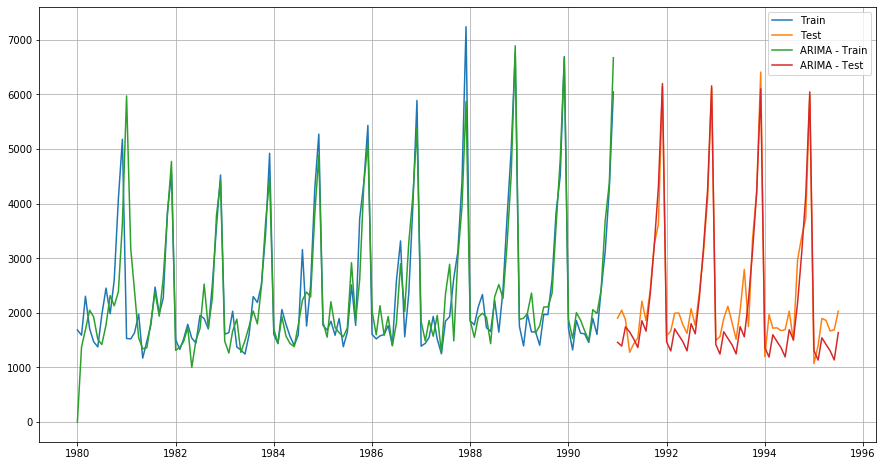

In [598]:
plt.plot(train,label='Train')
plt.plot(test,label='Test')

plt.plot(SARIMA_train.index,predicted_auto_SARIMA_train,label='ARIMA - Train')
plt.plot(SARIMA_test.index,predicted_auto_SARIMA,label='ARIMA - Test')
plt.legend(loc='best')
plt.grid();

### 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

In [459]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


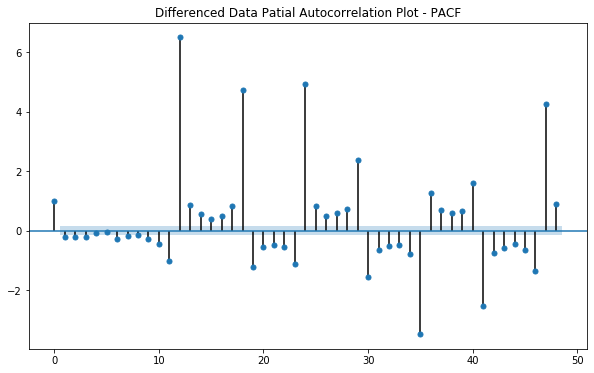

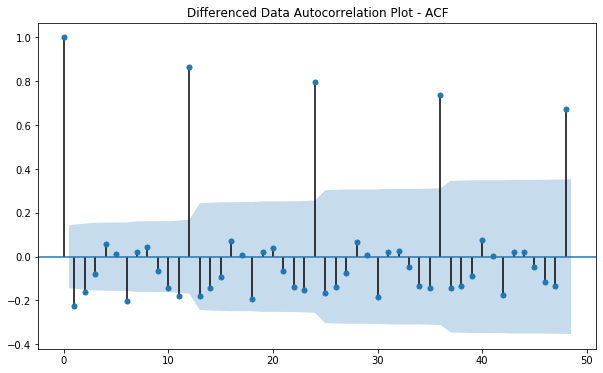

In [480]:
plot_pacf(sparkling.Sales.diff().dropna(),lags=48,title='Differenced Data Patial Autocorrelation Plot - PACF')
plot_acf(sparkling.Sales.diff().dropna(),lags=48,title='Differenced Data Autocorrelation Plot - ACF')

plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the lag at which the PACF plot cuts-off to 0.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the lag at which the ACF plot cuts-off to 0.

By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at 6(I am considering 6th line to be inside confidence interval) and 3 respectively.

Here we see p=5.But as a rule of thumb p shouldn't be greater then 2. So I am taking p=2. From ACF lot q=2.

In [ ]:
#p=3,q=2
#From Auto correlation plot we can see seasonality in data.
#p cuts off band at 4 in Partial auto correlation plot. So p=3.
#q cuts off band at 3 in  auto correlation plot(ACF). So q=2.

In [469]:
ARIMA_train

Sales   Predicted
YearMonth                    
1980-01-01   1686         NaN
1980-02-01   1591    6.203189
1980-03-01   2304   21.709357
1980-04-01   1712 -104.207464
1980-05-01   1471  -53.767350
...           ...         ...
1990-08-01   1605  676.128142
1990-09-01   2424  734.664475
1990-10-01   3116  388.340558
1990-11-01   4286 -105.714450
1990-12-01   6047 -805.904315

[132 rows x 2 columns]

In [472]:
manual_ARIMA = ARIMA(ARIMA_train['Sales'], order=(3,1,2),freq='MS')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                  131
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1107.464
Method:                       css-mle   S.D. of innovations           1106.085
Date:                Sun, 13 Sep 2020   AIC                           2228.927
Time:                        08:55:36   BIC                           2249.054
Sample:                    02-01-1980   HQIC                          2237.106
                         - 12-01-1990                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.9800        nan        nan        nan         nan         nan
ar.L1.D.Sales    -0.4420        nan        nan        nan         nan         nan
ar.L2.D.Sales     0.3079   6.33e-06   4.

C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\chith\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\chith\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\chith\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [473]:
manual_ARIMA = ARIMA(ARIMA_train['Sales'], order=(2,1,2),freq='MS')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.309
Method:                       css-mle   S.D. of innovations           1012.410
Date:                Sun, 13 Sep 2020   AIC                           2210.618
Time:                        08:56:37   BIC                           2227.869
Sample:                    02-01-1980   HQIC                          2217.628
                         - 12-01-1990                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.5858      0.516     10.819      0.000       4.574       6.598
ar.L1.D.Sales     1.2700      0.074     17.047      0.000       1.124       1.416
ar.L2.D.Sales    -0.5602      0.074     

C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [474]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(ARIMA_test))

In [564]:
predicted_manual_ARIMA_train=results_manual_ARIMA.fittedvalues

In [572]:
predicted_manual_ARIMA

(array([4246.36449018, 2817.54502327, 2013.41065517, 1794.29198067,
        1968.14548338, 2313.30953653, 2655.87384846, 2899.16295872,
        3017.83396685, 3033.86334255, 2989.35801249, 2925.47975331,
        2870.91232119, 2839.02251129, 2830.71592817, 2839.65413758,
        2857.28029506, 2876.27862841, 2892.15228986, 2903.28903676,
        2910.16067949, 2914.26962373, 2917.25952652, 2920.37605467,
        2924.28031358, 2929.11401172, 2934.68673939, 2940.67729608,
        2946.78444681, 2952.80558494, 2958.65217165, 2964.32527375,
        2969.87584835, 2975.36801076, 2980.85463644, 2986.36695511,
        2991.91500447, 2997.49403598, 3003.09239581, 3008.69794443,
        3014.30179413, 3019.89945889, 3025.49022087, 3031.07568167,
        3036.65827739, 3042.2402045 , 3047.82288761, 3053.40690537,
        3058.99219456, 3064.57835067, 3070.16489543, 3075.75144808,
        3081.33779303, 3086.92386977, 3092.50972227]),
 array([1012.41029037, 1049.07236707, 1071.49486637, 1154.905

In [569]:
predicted_manual_ARIMA_train

YearMonth
1980-02-01       5.585822
1980-03-01      17.342423
1980-04-01     -73.642678
1980-05-01     -22.158669
1980-06-01      64.745389
                 ...     
1990-08-01    1165.914370
1990-09-01    1581.102563
1990-10-01    1291.860666
1990-11-01     864.047441
1990-12-01     -84.788099
Length: 131, dtype: float64

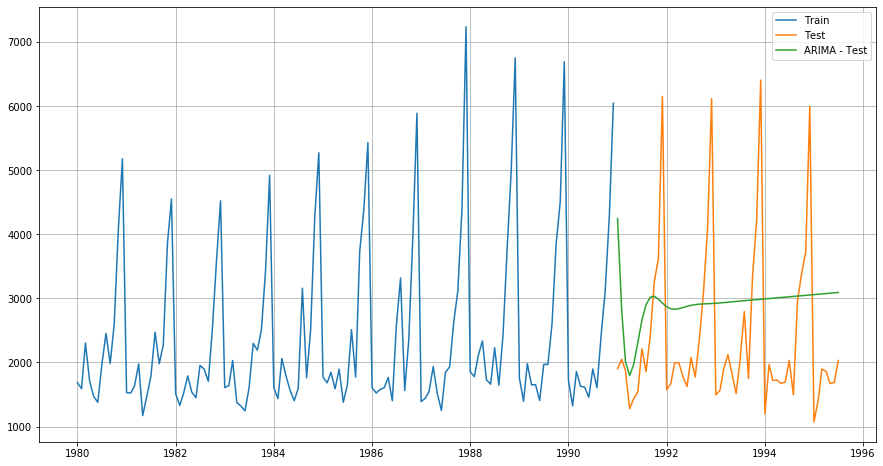

In [573]:
plt.plot(train,label='Train')
plt.plot(test,label='Test')

#plt.plot(ARIMA_train.index,predicted_manual_ARIMA_train,label='ARIMA - Train')
plt.plot(ARIMA_test.index,predicted_manual_ARIMA[0],label='ARIMA - Test')
plt.legend(loc='best')
plt.grid();

In [477]:
rmse = metrics.mean_squared_error(ARIMA_test['Sales'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

1374.786712941422


In [479]:
rmse,mape=calculate_metrics(ARIMA_test.Sales,predicted_manual_ARIMA[0])
tempDf = pd.DataFrame({'Test RMSE': [rmse],
                                'Test MAPE':[mape]}
                           ,index=['Manual ARIMA (2, 1, 2) '])

resultsDf = pd.concat([resultsDf, tempDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    1279.322346      40.05
RegressionOnTimeSeasonal                             420.866517      13.29
Naive                                               3864.279352     152.87
SimpleAvg                                           1275.081804      38.90
Trailing_MA_2                                        813.400684      19.70
Trailing_MA_3                                       1156.589694      35.96
Trailing_MA_6                                       1283.927428      43.86
Trailing_MA_9                                       1346.278315      46.86
SEC_alpha=0                                         1275.081823      38.90
Alpha=0.1,SimpleExponentialSmoothing                1275.081846      38.90
Alpha=0.2,SimpleExponentialSmoothing                1275.081846      38.90
DES Alpha=0.647,Beta=0                              3851.171500     152.07
Alpha=0,Beta=0,DoubleExponentialSmoothing           1460.954675      34.41
DES Alpha=0.647,Beta=0                               362.791906      12.08
Triple Exponential Smoothing Alpha=0.08,Beta=0,...   362.791906      12.08
Alpha=0.1,Beta=0,Gamma=0.3,TripleExponentialSmo...   479.738035      16.11
Alpha=0.1,Beta=0,Gamma=0.3,TripleExponentialSmo...   305.809982       9.72
Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmo...   305.809982       9.72
Alpha=0,Beta=0,Gamma=0.3,TripleExponentialSmoot...   309.601501       9.60
Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmo...   305.809982       9.72
Alpha=0,Beta=0,Gamma=0.2,TripleExponentialSmoot...   306.663375       9.82
Alpha=0,Beta=0,Gamma=0.3,TripleExponentialSmoot...   309.601501       9.60
ARIMA 2,1,1                                         1418.206709      51.28
ARIMA 2,1,1                                         1418.206709      51.28
SARIMA (1, 1, 2) (1, 0, 2, 12)                       528.608624      18.89
Auto SARIMA (1, 1, 2) (1, 0, 2, 12)                 1374.786713      48.38
Manual ARIMA (2, 1, 2)                              1374.786713      48.38

### Manual SARIMA

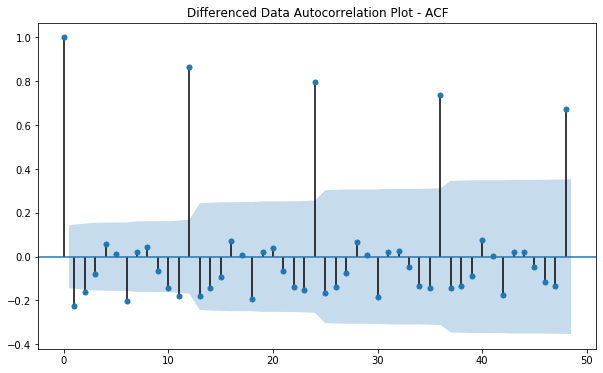

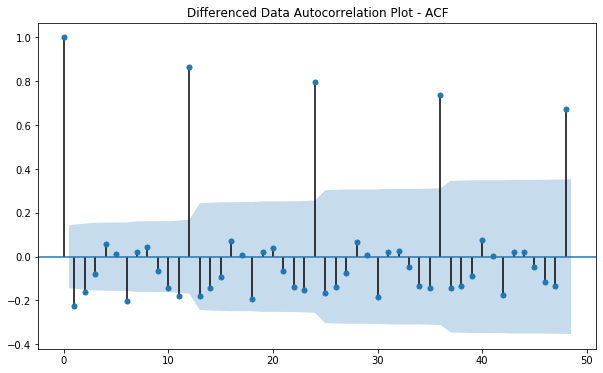

In [481]:
plot_acf(sparkling.Sales.diff().dropna(),lags=48,title='Differenced Data Autocorrelation Plot - ACF')


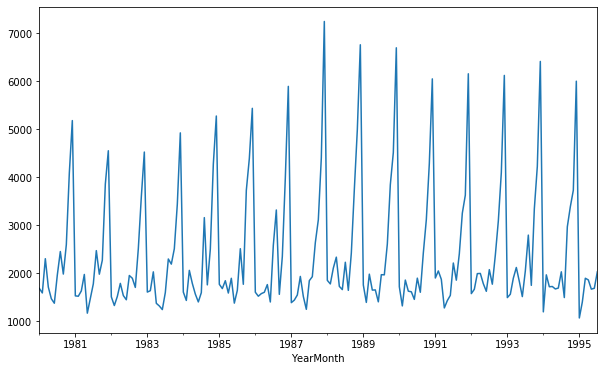

In [487]:
(sparkling.Sales).plot()

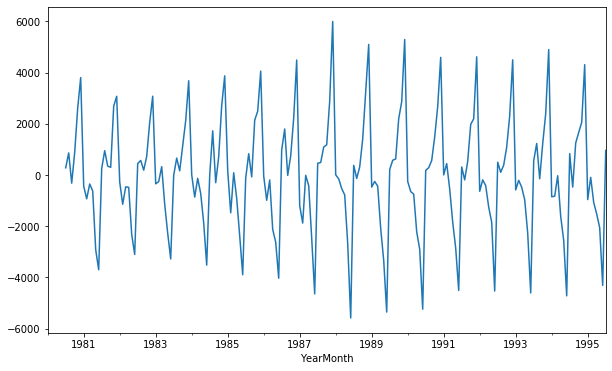

In [489]:
(sparkling.Sales.diff(12)).plot()

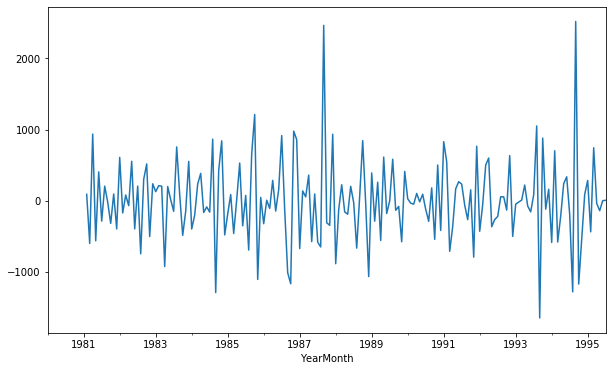

In [491]:
(sparkling.Sales.diff(12).diff()).plot()

In [493]:
dftest = adfuller(sparkling['Sales'].diff(12).diff().dropna())
dftest
print('DF test statistic is %3.3f' %dftest[0])

print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -5.114
DF test p-value is 0.0000


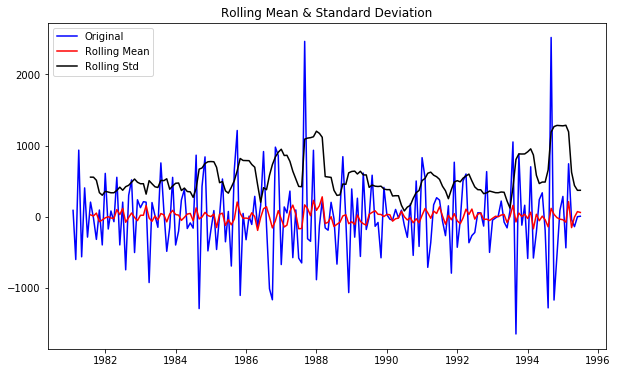

In [495]:
test_stationarity(sparkling['Sales'].diff(12).diff())

In [494]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

In [ ]:
#First order differencing of seasonal series is stationary

C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


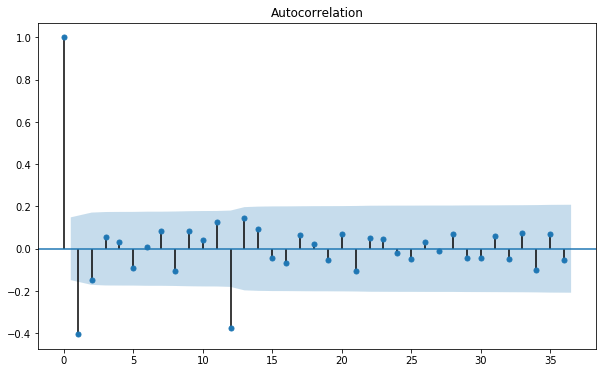

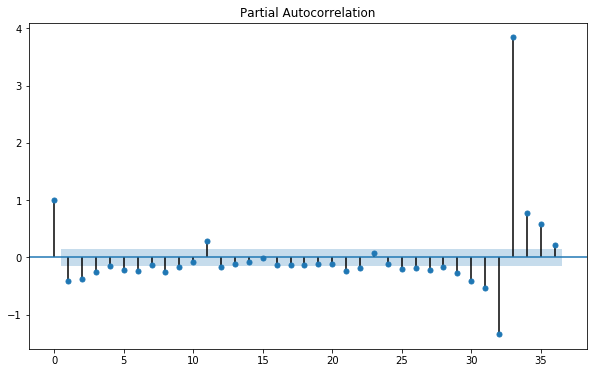

In [496]:
plot_acf((sparkling['Sales'].diff(12).dropna()).diff(1).dropna(),lags=36)
plot_pacf((sparkling['Sales'].diff(12).dropna()).diff(1).dropna(),lags=36);

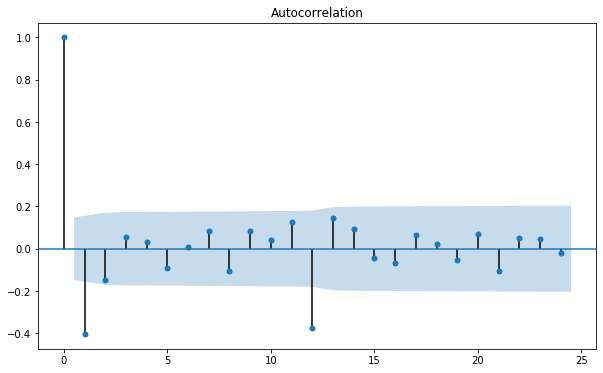

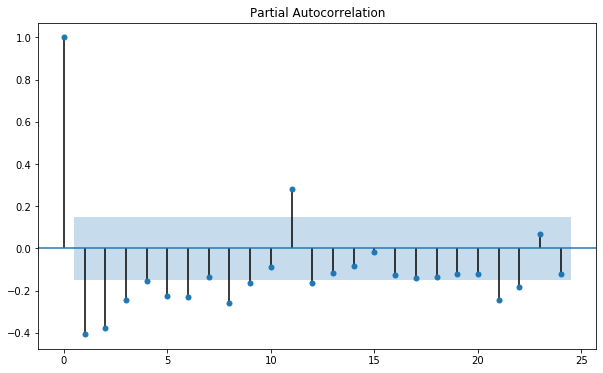

In [497]:
plot_acf((sparkling['Sales'].diff(12).dropna()).diff(1).dropna(),lags=24)
plot_pacf((sparkling['Sales'].diff(12).dropna()).diff(1).dropna(),lags=24);

In [ ]:
#P=1,Q=1,D=1
#p=2,q=2,d=1(from Manual ARIMA)

In [574]:
manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(SARIMA_train['Sales'],
                                order=(2, 1, 2),
                                seasonal_order=(2, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              Sales   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, 1, 12)   Log Likelihood                -692.592
Date:                            Mon, 14 Sep 2020   AIC                           1401.183
Time:                                    19:38:55   BIC                           1421.444
Sample:                                01-01-1980   HQIC                          1409.364
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5780      0.317     -1.824      0.068      -1.199       0.043
ar.L2          0.0176      0.159   

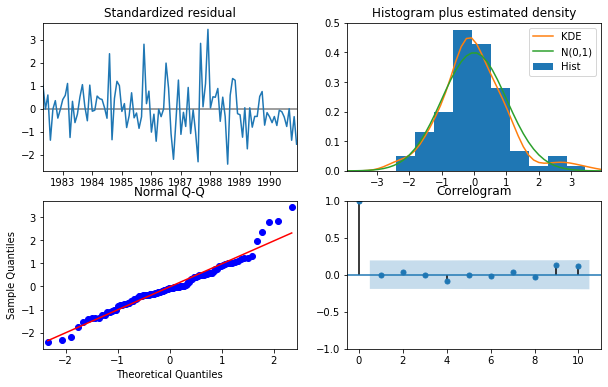

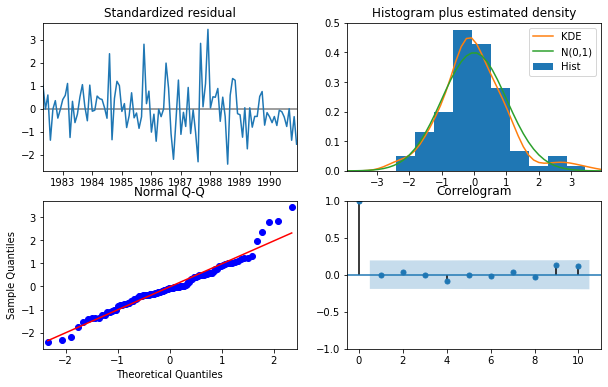

In [499]:
results_manual_SARIMA_12.plot_diagnostics()

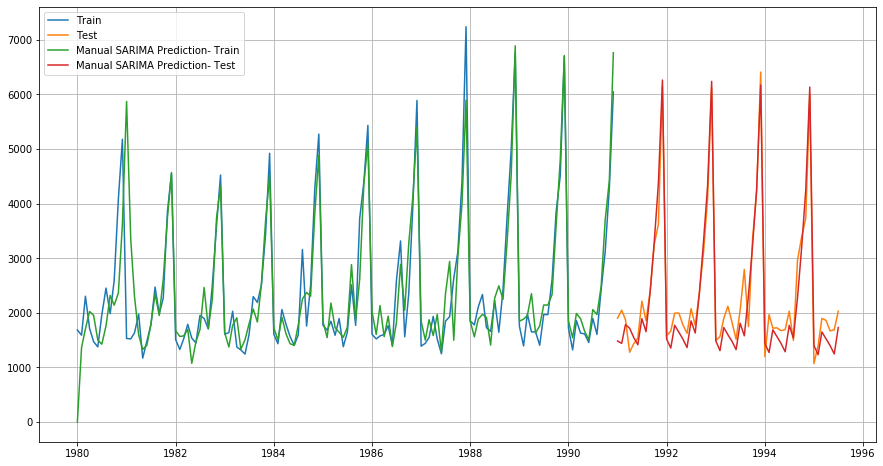

In [587]:
plt.plot(train,label='Train')
plt.plot(test,label='Test')

plt.plot(SARIMA_train.index,predicted_manual_SARIMA_12_train,label='Manual SARIMA Prediction- Train')
plt.plot(SARIMA_test.index,predicted_manual_SARIMA_12.predicted_mean,label='Manual SARIMA Prediction- Test')
plt.legend(loc='best')
plt.grid();

In [583]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [584]:
predicted_manual_SARIMA_12_train=results_manual_SARIMA_12.fittedvalues
predicted_manual_SARIMA_12_train

YearMonth
1980-01-01       0.000000
1980-02-01    1361.177783
1980-03-01    1708.263837
1980-04-01    2024.840333
1980-05-01    1953.301333
                 ...     
1990-08-01    1968.449445
1990-09-01    2481.578650
1990-10-01    3696.429248
1990-11-01    4423.293489
1990-12-01    6765.248844
Length: 132, dtype: float64

In [585]:
predicted_manual_SARIMA_12.predicted_mean

1991-01-01    1484.186817
1991-02-01    1441.227762
1991-03-01    1784.566790
1991-04-01    1718.332280
1991-05-01    1550.815828
1991-06-01    1415.577456
1991-07-01    1892.880652
1991-08-01    1655.440714
1991-09-01    2392.592680
1991-10-01    3295.032250
1991-11-01    4374.077834
1991-12-01    6264.786885
1992-01-01    1521.343864
1992-02-01    1354.732052
1992-03-01    1772.729085
1992-04-01    1645.995254
1992-05-01    1520.274954
1992-06-01    1364.111748
1992-07-01    1852.353875
1992-08-01    1630.895648
1992-09-01    2366.357276
1992-10-01    3285.072772
1992-11-01    4331.030826
1992-12-01    6240.257638
1993-01-01    1487.745414
1993-02-01    1307.236862
1993-03-01    1731.617135
1993-04-01    1599.034795
1993-05-01    1481.373159
1993-06-01    1326.569793
1993-07-01    1809.435826
1993-08-01    1579.605182
1993-09-01    2323.456945
1993-10-01    3218.539572
1993-11-01    4279.232736
1993-12-01    6172.421298
1994-01-01    1439.342134
1994-02-01    1273.469905
1994-03-01  

In [586]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

Sales              mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  1484.186817  413.724221     673.302243    2295.071390
1991-02-01  1441.227762  429.276056     599.862154    2282.593370
1991-03-01  1784.566790  429.760336     942.252010    2626.881570
1991-04-01  1718.332280  432.930190     869.804700    2566.859860
1991-05-01  1550.815828  433.002159     702.147191    2399.484465

In [589]:
rmse,mape=calculate_metrics(SARIMA_test.Sales,predicted_manual_SARIMA_12.predicted_mean)
tempDf = pd.DataFrame({'Test RMSE': [rmse],
                                'Test MAPE':[mape]}
                           ,index=['Manual SARIMA (2, 1, 2)(2, 1, 1, 12)'])

resultsDf = pd.concat([resultsDf, tempDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    1279.322346      40.05
RegressionOnTimeSeasonal                             420.866517      13.29
Naive                                               3864.279352     152.87
SimpleAvg                                           1275.081804      38.90
Trailing_MA_2                                        813.400684      19.70
Trailing_MA_3                                       1156.589694      35.96
Trailing_MA_6                                       1283.927428      43.86
Trailing_MA_9                                       1346.278315      46.86
SEC_alpha=0                                         1275.081823      38.90
Alpha=0.1,SimpleExponentialSmoothing                1275.081846      38.90
Alpha=0.2,SimpleExponentialSmoothing                1275.081846      38.90
DES Alpha=0.647,Beta=0                              3851.171500     152.07
Alpha=0,Beta=0,DoubleExponentialSmoothing           1460.954675      34.41
DES Alpha=0.647,Beta=0                               362.791906      12.08
Triple Exponential Smoothing Alpha=0.08,Beta=0,...   362.791906      12.08
Alpha=0.1,Beta=0,Gamma=0.3,TripleExponentialSmo...   479.738035      16.11
Alpha=0.1,Beta=0,Gamma=0.3,TripleExponentialSmo...   305.809982       9.72
Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmo...   305.809982       9.72
Alpha=0,Beta=0,Gamma=0.3,TripleExponentialSmoot...   309.601501       9.60
Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmo...   305.809982       9.72
Alpha=0,Beta=0,Gamma=0.2,TripleExponentialSmoot...   306.663375       9.82
Alpha=0,Beta=0,Gamma=0.3,TripleExponentialSmoot...   309.601501       9.60
ARIMA 2,1,1                                         1418.206709      51.28
ARIMA 2,1,1                                         1418.206709      51.28
SARIMA (1, 1, 2) (1, 0, 2, 12)                       528.608624      18.89
Auto SARIMA (1, 1, 2) (1, 0, 2, 12)                 1374.786713      48.38
Manual ARIMA (2, 1, 2)                              1374.786713      48.38
Manual ARIMA (2, 1, 2)                               445.436300      15.22
Manual SARIMA (2, 1, 2) 12                           445.436300      15.22
Manual SARIMA (2, 1, 2)(1, 1, 1, 12)                 353.176879      11.57
Manual SARIMA (2, 1, 2)(2, 1, 1, 12)                 353.176879      11.57

## 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [509]:
resultsDf.sort_values('Test RMSE')

Test RMSE  Test MAPE
Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmo...   305.809982       9.72
Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmo...   305.809982       9.72
Alpha=0.1,Beta=0,Gamma=0.3,TripleExponentialSmo...   305.809982       9.72
Alpha=0,Beta=0,Gamma=0.2,TripleExponentialSmoot...   306.663375       9.82
Alpha=0,Beta=0,Gamma=0.3,TripleExponentialSmoot...   309.601501       9.60
Alpha=0,Beta=0,Gamma=0.3,TripleExponentialSmoot...   309.601501       9.60
Triple Exponential Smoothing Alpha=0.08,Beta=0,...   362.791906      12.08
DES Alpha=0.647,Beta=0                               362.791906      12.08
RegressionOnTimeSeasonal                             420.866517      13.29
Manual ARIMA (2, 1, 2)                               445.436300      15.22
Manual SARIMA (2, 1, 2) 12                           445.436300      15.22
Alpha=0.1,Beta=0,Gamma=0.3,TripleExponentialSmo...   479.738035      16.11
SARIMA (1, 1, 2) (1, 0, 2, 12)                       528.608624      18.89
Trailing_MA_2                                        813.400684      19.70
Trailing_MA_3                                       1156.589694      35.96
SimpleAvg                                           1275.081804      38.90
SEC_alpha=0                                         1275.081823      38.90
Alpha=0.1,SimpleExponentialSmoothing                1275.081846      38.90
Alpha=0.2,SimpleExponentialSmoothing                1275.081846      38.90
RegressionOnTime                                    1279.322346      40.05
Trailing_MA_6                                       1283.927428      43.86
Trailing_MA_9                                       1346.278315      46.86
Auto SARIMA (1, 1, 2) (1, 0, 2, 12)                 1374.786713      48.38
Manual ARIMA (2, 1, 2)                              1374.786713      48.38
ARIMA 2,1,1                                         1418.206709      51.28
ARIMA 2,1,1                                         1418.206709      51.28
Alpha=0,Beta=0,DoubleExponentialSmoothing           1460.954675      34.41
DES Alpha=0.647,Beta=0                              3851.171500     152.07
Naive                                               3864.279352     152.87

Triple Exponential Smoothing is the best model
Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmoothing

## 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [516]:
best_model = ExponentialSmoothing(sparkling['Sales'],seasonal_periods = 12 ,trend='additive',seasonal='additive')
best_model_fit = best_model.fit(smoothing_level=0.1,smoothing_slope=0,smoothing_seasonal=0.2)

## Prediction 

predict_12months= best_model_fit.forecast(steps=12)
predict_12months

C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


1995-08-01    2010.585189
1995-09-01    2337.652819
1995-10-01    3207.740967
1995-11-01    4054.573393
1995-12-01    6095.743172
1996-01-01    1424.412332
1996-02-01    1607.416418
1996-03-01    1860.482182
1996-04-01    1798.487021
1996-05-01    1651.450777
1996-06-01    1546.305590
1996-07-01    2002.224942
Freq: MS, dtype: float64

In [519]:
best_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:                    endog   No. Observations:                  187
Model:             ExponentialSmoothing   SSE                       26131735.806
Optimized:                         True   AIC                           2247.492
Trend:                         Additive   BIC                           2299.190
Seasonal:                      Additive   AICC                          2251.564
Seasonal Periods:                    12   Date:                 Sun, 13 Sep 2020
Box-Cox:                          False   Time:                         11:36:16
Box-Cox Coeff.:                    None                                         
=================================================================================
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1000000                alpha                False
smoothing_slope                0.000000                 beta                False
smoothing_seasonal            0.2000000                gamma                False
initial_level                 1580.0000                  l.0                 True
initial_slope                  0.000000                  b.0                 True
initial_seasons.0             106.00000                  s.0                 True
initial_seasons.1             11.000000                  s.1                 True
initial_seasons.2             724.00000                  s.2                 True
initial_seasons.3             132.00000                  s.3                 True
initial_seasons.4            -109.00000                  s.4                 True
initial_seasons.5            -203.00000                  s.5                 True
initial_seasons.6             386.00000                  s.6                 True
initial_seasons.7             873.00000                  s.7                 True
initial_seasons.8             404.00000                  s.8                 True
initial_seasons.9             1016.0000                  s.9                 True
initial_seasons.10            2507.0000                 s.10                 True
initial_seasons.11            3599.0000                 s.11                 True
---------------------------------------------------------------------------------
"""

In [ ]:
initial_seasons.10 =2507 and initial_seasons.11=3599

In [528]:
resid_std=best_model_fit.resid.std()

In [525]:
best_model_fit.resid.mean()

4.573984950042154

In [ ]:
#No trend, predicted values depend on whole data (low alpha)
#some seasonality effect

In [531]:
predict_12months

1995-08-01    2010.585189
1995-09-01    2337.652819
1995-10-01    3207.740967
1995-11-01    4054.573393
1995-12-01    6095.743172
1996-01-01    1424.412332
1996-02-01    1607.416418
1996-03-01    1860.482182
1996-04-01    1798.487021
1996-05-01    1651.450777
1996-06-01    1546.305590
1996-07-01    2002.224942
Freq: MS, dtype: float64

In [529]:
predict_12months+1.96*resid_std

1995-08-01    2745.185684
1995-09-01    3072.253313
1995-10-01    3942.341462
1995-11-01    4789.173887
1995-12-01    6830.343666
1996-01-01    2159.012827
1996-02-01    2342.016912
1996-03-01    2595.082676
1996-04-01    2533.087515
1996-05-01    2386.051271
1996-06-01    2280.906084
1996-07-01    2736.825436
Freq: MS, dtype: float64

In [530]:
predict_12months-1.96*resid_std

1995-08-01    1275.984695
1995-09-01    1603.052325
1995-10-01    2473.140473
1995-11-01    3319.972899
1995-12-01    5361.142677
1996-01-01     689.811838
1996-02-01     872.815924
1996-03-01    1125.881688
1996-04-01    1063.886527
1996-05-01     916.850283
1996-06-01     811.705096
1996-07-01    1267.624448
Freq: MS, dtype: float64

In [532]:
sales=pd.DataFrame()
sales['Predicted']=predict_12months
sales['CI_Lower']=predict_12months-1.96*resid_std
sales['CI_Upper']=predict_12months+1.96*resid_std

In [533]:
sales

Predicted     CI_Lower     CI_Upper
1995-08-01  2010.585189  1275.984695  2745.185684
1995-09-01  2337.652819  1603.052325  3072.253313
1995-10-01  3207.740967  2473.140473  3942.341462
1995-11-01  4054.573393  3319.972899  4789.173887
1995-12-01  6095.743172  5361.142677  6830.343666
1996-01-01  1424.412332   689.811838  2159.012827
1996-02-01  1607.416418   872.815924  2342.016912
1996-03-01  1860.482182  1125.881688  2595.082676
1996-04-01  1798.487021  1063.886527  2533.087515
1996-05-01  1651.450777   916.850283  2386.051271
1996-06-01  1546.305590   811.705096  2280.906084
1996-07-01  2002.224942  1267.624448  2736.825436

In [ ]:
#There is seasonality at 12

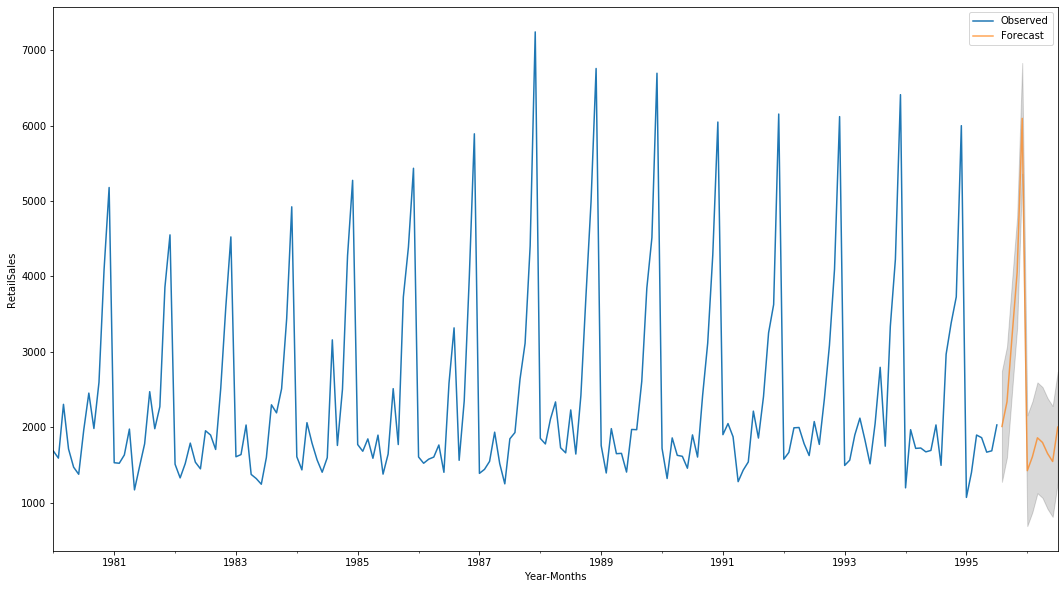

In [535]:
# plot the forecast along with the confidence band
plt.figure(figsize=(18,10))
axis = sparkling['Sales'].plot(label='Observed')
predict_12months.plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(sales.index, sales['CI_Lower'], 
                  sales['CI_Upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('RetailSales')
plt.legend(loc='best')
plt.show()

Farther into the future we predict,more uncertainity.

The confidence intervals can be calculated manually for any method.

Assume that the forecast errors are normally distributed, a 95% prediction interval.

So The confidence interval for any forecast is 

Confidence Values for given period = yt+1 + 1.96 * standard deviation of residuals 